# Imports & Config

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Style plot
plt.style.use('default')
font = {'size' : 32}
plt.rc('font', **font)
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

# Define functions

In [263]:
def get_percentage_df(df):
    df_perc = df[df['verified'] == True].groupby('millis').mean()
    df_perc['percentage_solved'] = 0.0
    size = df.shape[0]
    print("Dataframe contains " + str(size) + " elements")

    for index, row in df_perc.iterrows():
        df_solved = df[df['verified'] == True]
        num_solved = df_solved[df_solved['millis'] <= index].shape[0]
        percentage_solved = num_solved / df.shape[0]
        df_perc.at[index, 'percentage_solved'] = percentage_solved
    df_perc.at[180000, 'percentage_solved'] = df[df['verified'] == True].shape[0] / df.shape[0]

    return df_perc

def get_text_and_percent(df):
    text = str(df[df['verified'] == True].shape[0]) + "/" + str(df.shape[0])
    perc = df[df['verified'] == True].shape[0] / df.shape[0]
    return text, perc

def get_heuristic_percentage_values(df):
    mean_x = df['difference'].mean()
    mean_y = np.count_nonzero(df['difference'] <= mean_x) / df.shape[0]
    return mean_x, mean_y

def get_heuristic_percentage_df(df):
    df_perc = df.groupby('difference').mean()
    df_perc['percentage_solved'] = 0.0
    size = df.shape[0]
    print("Dataframe contains " + str(size) + " elements")

    for index, row in df_perc.iterrows():
        num_solved = df[df['difference'] <= index].shape[0]
        percentage_solved = num_solved / df.shape[0]
        df_perc.at[index, 'percentage_solved'] = percentage_solved
    #df_perc.at[180000, 'percentage_solved'] = df[df['verified'] == True].shape[0] / df.shape[0]

    return df_perc

def add_percentage_df(df_perc, df_add):
    df_perc['percentage_solved_y'] = 0.0
    for index, row in df_perc.iterrows():
        df_solved = df_add[df_add['verified'] == True]
        num_solved = df_solved[df_solved['millis'] <= index].shape[0]
        percentage_solved = num_solved / df_add.shape[0]
        df_perc.at[index, 'percentage_solved_y'] = percentage_solved
    df_perc.at[180000, 'percentage_solved_y'] = df_add[df_add['verified'] == True].shape[0] / df_add.shape[0]
    return df_perc

def split_synthetic_complex(df):
    df_synthetic = df[df['name'].str.match('synth')]
    df_complex = df[~df['name'].str.match('synth')]
    return df_synthetic, df_complex

def print_heuristic_results(name, df):
    print("Results for '" + name + "':")
    df_synthetic, df_complex = split_synthetic_complex(df)
    synthetic_mean = df_synthetic['difference'].mean()
    print("Synthetic: " + str(round(synthetic_mean, 4)))
    complex_mean = df_complex['difference'].mean()
    print("Complex: " + str(round(complex_mean, 4)))
    overall_mean = df['difference'].mean()
    print("Overall: " + str(round(overall_mean, 4)))
    print()

def print_results(name, df):
    print("Results for '" + name + "':")
    df_synthetic, df_complex = split_synthetic_complex(df)
    num_synthetic = df_synthetic.shape[0]
    df_synthetic_solved = df_synthetic[df_synthetic['verified'] == True]
    num_synthetic_solved = df_synthetic_solved.shape[0]
    percentage_solved = num_synthetic_solved * 100 / num_synthetic if num_synthetic else 100
    print("Synthetic: " + str(num_synthetic_solved) + "/" + str(num_synthetic) + " (" + str(round(percentage_solved, 2)) + "%)")

    num_complex = df_complex.shape[0]
    df_complex_solved = df_complex[df_complex['verified'] == True]
    num_complex_solved = df_complex_solved.shape[0]
    percentage_solved = num_complex_solved * 100 / num_complex if num_complex else 100
    print("Complex: " + str(num_complex_solved) + "/" + str(num_complex) + " (" + str(round(percentage_solved, 2)) + "%)")

    num_overall = df.shape[0]
    df_solved = df[df['verified'] == True]
    num_solved = df_solved.shape[0]
    percentage_solved = num_solved * 100 / num_overall if num_overall else 100
    print("Overall: " + str(num_solved) + "/" + str(num_overall) + " (" + str(round(percentage_solved, 2)) + "%)")
    print()

# Load Data

In [399]:
# Worst solution
dfh_0 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-WorstSolution.csv", sep=",", header=0)
dfh_0['difference'] = dfh_0['k_approx'] / dfh_0['k_optimal']

# DFAS Greedy
dfh_a1 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFAS_1_MinIn.csv", sep=",", header=0)
dfh_a1['difference'] = dfh_a1['k_approx'] / dfh_a1['k_optimal']
dfh_a2 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFAS_2_MaxOut.csv", sep=",", header=0)
dfh_a2['difference'] = dfh_a2['k_approx'] / dfh_a2['k_optimal']
dfh_a3 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFAS_3_MinInMaxOut.csv", sep=",", header=0)
dfh_a3['difference'] = dfh_a3['k_approx'] / dfh_a3['k_optimal']
dfh_a4 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFAS_4_MaxOutMinIn.csv", sep=",", header=0)
dfh_a4['difference'] = dfh_a4['k_approx'] / dfh_a4['k_optimal']

# DFAS Greedy + Shift
dfh_a5 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFAS_5_MinIn+Shift.csv", sep=",", header=0)
dfh_a5['difference'] = dfh_a5['k_approx'] / dfh_a5['k_optimal']
dfh_a6 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFAS_6_MaxOut+Shift.csv", sep=",", header=0)
dfh_a6['difference'] = dfh_a6['k_approx'] / dfh_a6['k_optimal']
dfh_a7 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFAS_7_MinInMaxOut+Shift.csv", sep=",", header=0)
dfh_a7['difference'] = dfh_a7['k_approx'] / dfh_a7['k_optimal']
dfh_a8 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFAS_8_MaxOutMinIn+Shift.csv", sep=",", header=0)
dfh_a8['difference'] = dfh_a8['k_approx'] / dfh_a8['k_optimal']

# DFAS Greedy + Swap
dfh_a13 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFAS_13_MaxMinInOut.csv", sep=",", header=0)
dfh_a13['difference'] = dfh_a13['k_approx'] / dfh_a13['k_optimal']
dfh_a14 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFAS_14_MaxMinInOut+Shifts.csv", sep=",", header=0)
dfh_a14['difference'] = dfh_a14['k_approx'] / dfh_a14['k_optimal']
dfh_a15 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFAS_15_MaxMinInOut+Swaps.csv", sep=",", header=0)
dfh_a15['difference'] = dfh_a15['k_approx'] / dfh_a15['k_optimal']

# DFVS Nodes Heuristic
dfh_v1 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFVS_1_MaxIn.csv", sep=",", header=0)
dfh_v1['difference'] = dfh_v1['k_approx'] / dfh_v1['k_optimal']
dfh_v2 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFVS_2_MaxOut.csv", sep=",", header=0)
dfh_v2['difference'] = dfh_v2['k_approx'] / dfh_v2['k_optimal']
dfh_v3 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFVS_3_MaxInPlusOut.csv", sep=",", header=0)
dfh_v3['difference'] = dfh_v3['k_approx'] / dfh_v3['k_optimal']
dfh_v4 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFVS_4_MaxMinInOut.csv", sep=",", header=0)
dfh_v4['difference'] = dfh_v4['k_approx'] / dfh_v4['k_optimal']

# DFVS Cycles Heuristic
dfh_v5 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFVS_5_LightBFS.csv", sep=",", header=0)
dfh_v5['difference'] = dfh_v5['k_approx'] / dfh_v5['k_optimal']
dfh_v6 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFVS_6_FullBFS.csv", sep=",", header=0)
dfh_v6['difference'] = dfh_v6['k_approx'] / dfh_v6['k_optimal']
dfh_v7 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFVS_7_FullBFSMultiple.csv", sep=",", header=0)
dfh_v7['difference'] = dfh_v7['k_approx'] / dfh_v7['k_optimal']

# DFVS Timer Heuristics
dfh_v8 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFVS_8_TimerFast100.csv", sep=",", header=0)
dfh_v8['difference'] = dfh_v8['k_approx'] / dfh_v8['k_optimal']
dfh_v9 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFVS_9_TimerFast1000.csv", sep=",", header=0)
dfh_v9['difference'] = dfh_v9['k_approx'] / dfh_v9['k_optimal']
dfh_v10 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFVS_10_TimerFast10000.csv", sep=",", header=0)
dfh_v10['difference'] = dfh_v10['k_approx'] / dfh_v10['k_optimal']

# Create performance dataframes
df_v3 = pd.read_csv("../logs/v3/MainLog-3.2_UpdatePacking.csv", sep=",", header=0) # V3 Packing (with updates)
df_v3['millis'].clip(0, 90000)
df_v3['millis'] = df_v3['millis'] * 2
df_ilp = pd.read_csv("../logs/v4/ILPLog-4.11_LazyCyclesDoublePacking.csv", sep=",", header=0) # V4 ILP Lazy Cycles
df_ilp['millis'].clip(0, 90000)
df_ilp['millis'] = df_ilp['millis'] * 2
df_0 = pd.read_csv("../logs/v5/MainLog-5.0.csv", sep=",", header=0)
df_0['millis'].clip(0, 90000)
df_0['millis'] = df_0['millis'] * 2
df_pace = pd.read_csv("../logs/v5/PaceLog.csv", sep=",", header=0)
df_pace['millis'].clip(0, 90000)
df_pace['millis'] = df_pace['millis'] * 2
df_pace['difference'] = df_pace['heuristic_size'] - df_pace['packing_size']

df_1 = pd.read_csv("../logs/v5/MainLog-1000-0.5.csv", sep=",", header=0)
df_1['millis'].clip(0, 90000)
df_1['millis'] = df_1['millis'] * 2
df_1['difference'] = df_1['heuristic_size'] - df_1['packing_size']
df_2 = pd.read_csv("../logs/v5/MainLog-1000-1.0.csv", sep=",", header=0)
df_2['millis'].clip(0, 90000)
df_2['millis'] = df_2['millis'] * 2
df_2['difference'] = df_2['heuristic_size'] - df_2['packing_size']
df_3 = pd.read_csv("../logs/v5/MainLog-10000-0.5.csv", sep=",", header=0)
df_3['millis'].clip(0, 90000)
df_3['millis'] = df_3['millis'] * 2
df_4 = pd.read_csv("../logs/v5/MainLog-10000-1.0.csv", sep=",", header=0)
df_4['millis'].clip(0, 90000)
df_4['millis'] = df_4['millis'] * 2
df_4['difference'] = df_4['heuristic_size'] - df_4['packing_size']



# Print Results

In [367]:
print_results('V3 Update Packing', df_v3)
print_results('V4 ILP Lazy Cycles', df_ilp)
print_results('PACE', df_pace)
print_results('Mainlog Final Improvements', df_0)
print_results('1000 0.5', df_1)
print_results('1000 1.0', df_2)
print_results('10000 0.5', df_3)
print_results('10000 1.0', df_4)

print_heuristic_results('DFAS Min In', dfh_a1)
print_heuristic_results('DFAS Max Out', dfh_a2)
print_heuristic_results('DFAS Min In -> Max Out', dfh_a3)

print_heuristic_results('DFAS max min(in,out)', dfh_a13)
print_heuristic_results('DFAS max min(in,out) + shifts', dfh_a14)
print_heuristic_results('DFAS max min(in,out) + swaps', dfh_a15)

print_heuristic_results('DFVS Max In', dfh_v1)
print_heuristic_results('DFVS Max Out', dfh_v2)
print_heuristic_results('DFVS Max In + Out', dfh_v3)
print_heuristic_results('DFVS Max Min(In, Out)', dfh_v4)

print_heuristic_results('DFVS Light BFS', dfh_v5)
print_heuristic_results('DFVS Full BFS', dfh_v6)
print_heuristic_results('DFVS Full BFS Multiple', dfh_v7)

print_heuristic_results('DFVS Timer 100', dfh_v8)
print_heuristic_results('DFVS Timer 1000', dfh_v9)
print_heuristic_results('DFVS Timer 10000', dfh_v10)

Results for 'V3 Update Packing':
Synthetic: 233/315 (73.97%)
Complex: 112/137 (81.75%)
Overall: 345/452 (76.33%)

Results for 'V4 ILP Lazy Cycles':
Synthetic: 297/315 (94.29%)
Complex: 126/137 (91.97%)
Overall: 423/452 (93.58%)

Results for 'PACE':
Synthetic: 0/0 (100%)
Complex: 29/77 (37.66%)
Overall: 29/77 (37.66%)

Results for 'Mainlog Final Improvements':
Synthetic: 288/315 (91.43%)
Complex: 113/137 (82.48%)
Overall: 401/452 (88.72%)

Results for '1000 0.5':
Synthetic: 294/315 (93.33%)
Complex: 113/137 (82.48%)
Overall: 407/452 (90.04%)

Results for '1000 1.0':
Synthetic: 295/315 (93.65%)
Complex: 113/137 (82.48%)
Overall: 408/452 (90.27%)

Results for '10000 0.5':
Synthetic: 294/315 (93.33%)
Complex: 113/137 (82.48%)
Overall: 407/452 (90.04%)

Results for '10000 1.0':
Synthetic: 295/315 (93.65%)
Complex: 113/137 (82.48%)
Overall: 408/452 (90.27%)

Results for 'DFAS Min In':
Synthetic: 18.7342
Complex: 1.2737
Overall: 13.8221

Results for 'DFAS Max Out':
Synthetic: 11.5775
Complex:

# DFAS Heuristic Line Plot

Dataframe contains 423 elements
Dataframe contains 423 elements
Dataframe contains 423 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_21224/1466667125.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


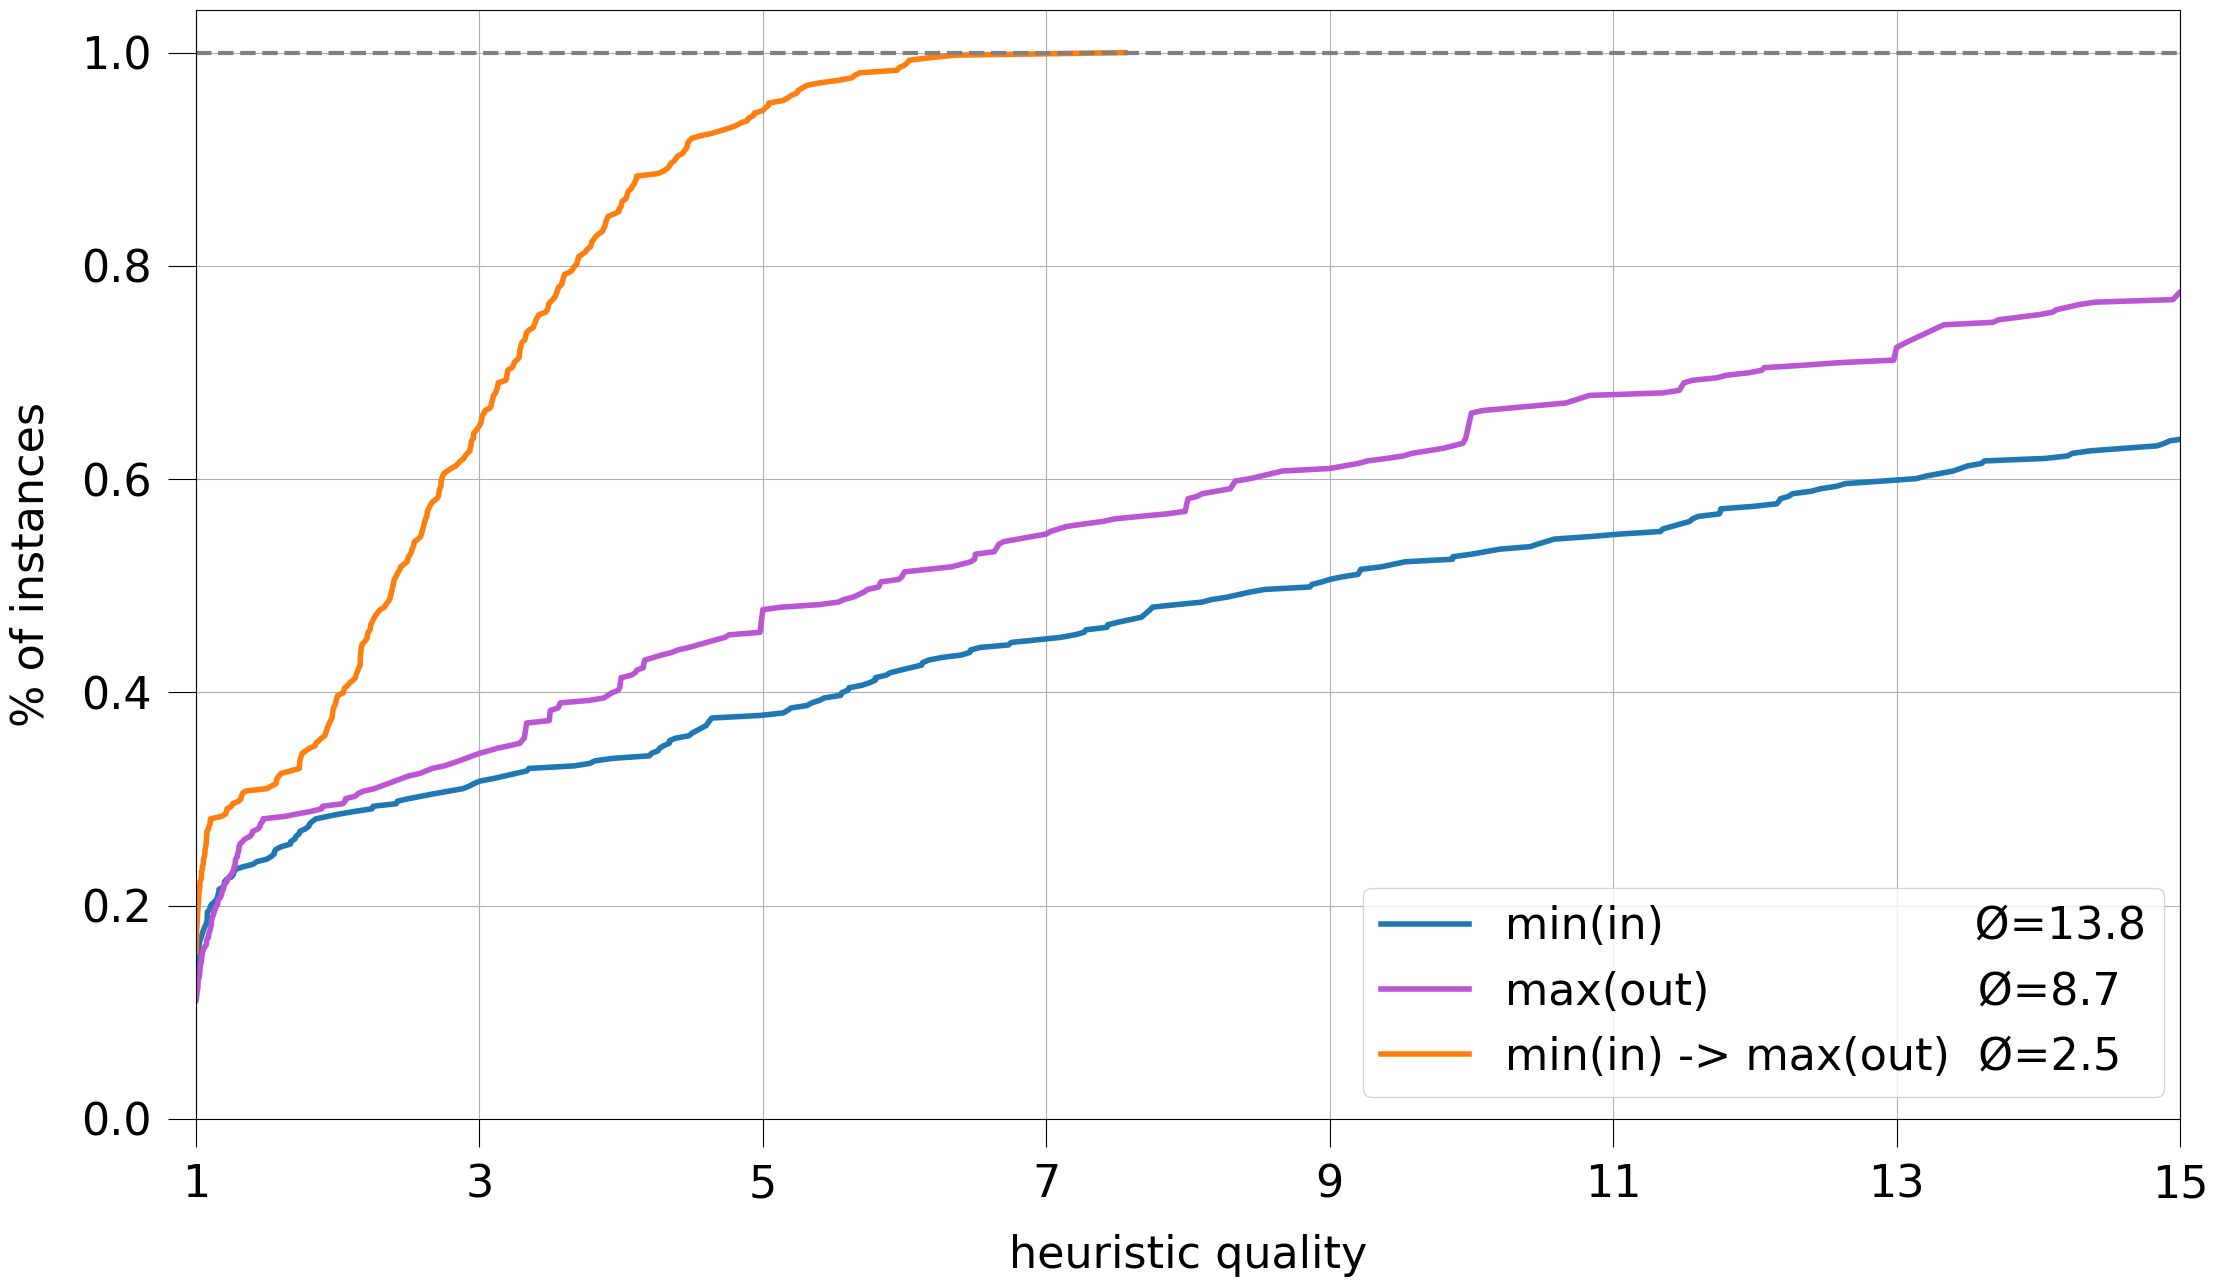

In [337]:
# Calculate percentage dataframes
df_0_perc = get_heuristic_percentage_df(dfh_a1)
df_1_perc = get_heuristic_percentage_df(dfh_a2)
df_2_perc = get_heuristic_percentage_df(dfh_a3)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_0_perc['percentage_solved'], c='tab:blue', linewidth='4', label='min(in)                      Ø=' + str(round(dfh_a1['difference'].mean(), 1)))
ax.plot(df_1_perc['percentage_solved'], c='mediumorchid', linewidth='4', label='max(out)                   Ø=' + str(round(dfh_a2['difference'].mean(), 1)))
ax.plot(df_2_perc['percentage_solved'], c='tab:orange', linewidth='4', label='min(in) -> max(out)  Ø=' + str(round(dfh_a3['difference'].mean(), 1)))

ax.set_xlabel('heuristic quality', labelpad=20)
ax.set_ylabel('% of instances', labelpad=20)
ax.set_xlim([1, 15])
ax.set_ylim([0.0, 1.04])
ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 0.0, 1.58, 0), loc='lower center', ncol=1)

# Draw
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)

fig.savefig('plots/v5/DFASLinePlot1.png',  bbox_inches='tight')
fig.show()

# DFAS Heuristic Line Plot 2

Dataframe contains 423 elements
Dataframe contains 423 elements
Dataframe contains 423 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_21224/969513838.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


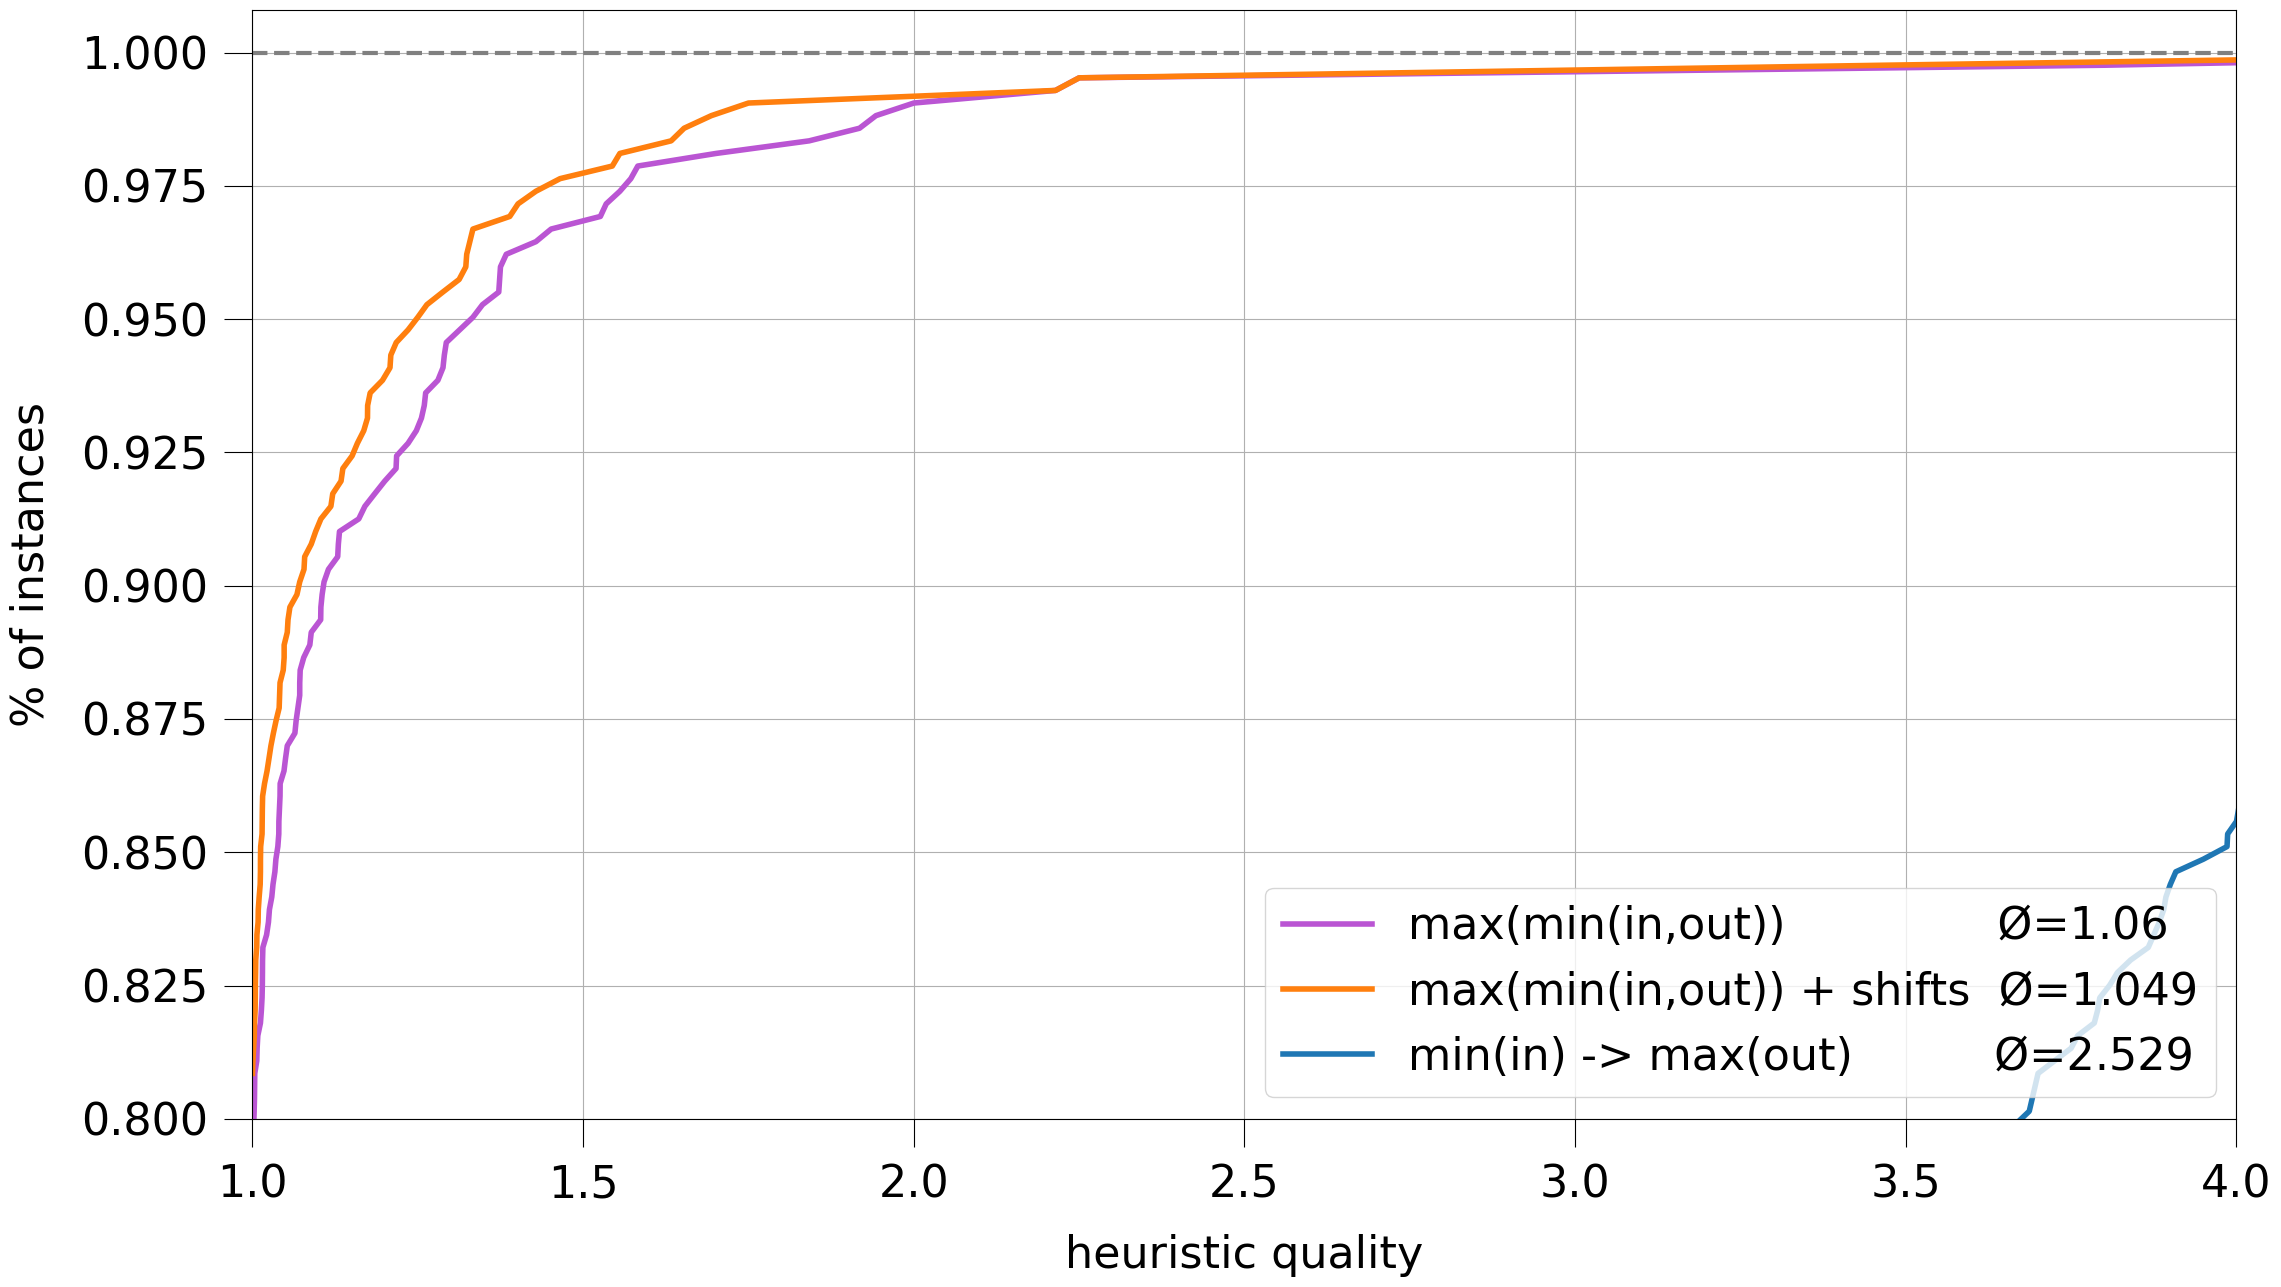

In [398]:
# Calculate percentage dataframes
df_0_perc = get_heuristic_percentage_df(dfh_a13)
df_1_perc = get_heuristic_percentage_df(dfh_a14)
df_2_perc = get_heuristic_percentage_df(dfh_a3)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_0_perc['percentage_solved'], c='mediumorchid', linewidth='4', label='max(min(in,out))               Ø=' + str(round(dfh_a13['difference'].mean(), 3)))
ax.plot(df_1_perc['percentage_solved'], c='tab:orange', linewidth='4', label='max(min(in,out)) + shifts  Ø=' + str(round(dfh_a14['difference'].mean(), 3)))
ax.plot(df_2_perc['percentage_solved'], c='tab:blue', linewidth='4', label='min(in) -> max(out)          Ø=' + str(round(dfh_a3['difference'].mean(), 3)))

ax.set_xlabel('heuristic quality', labelpad=20)
ax.set_ylabel('% of instances', labelpad=20)
ax.set_xlim([1, 4])
ax.set_ylim([0.8, 1.008])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 0.0, 1.5, 0), loc='lower center', ncol=1)

# Draw
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)

fig.savefig('plots/v5/DFASLinePlot2.png',  bbox_inches='tight')
fig.show()

# DFVS Greedy Heuristic Line Plot

Dataframe contains 423 elements
Dataframe contains 423 elements
Dataframe contains 423 elements
Dataframe contains 423 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_21224/1669140184.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


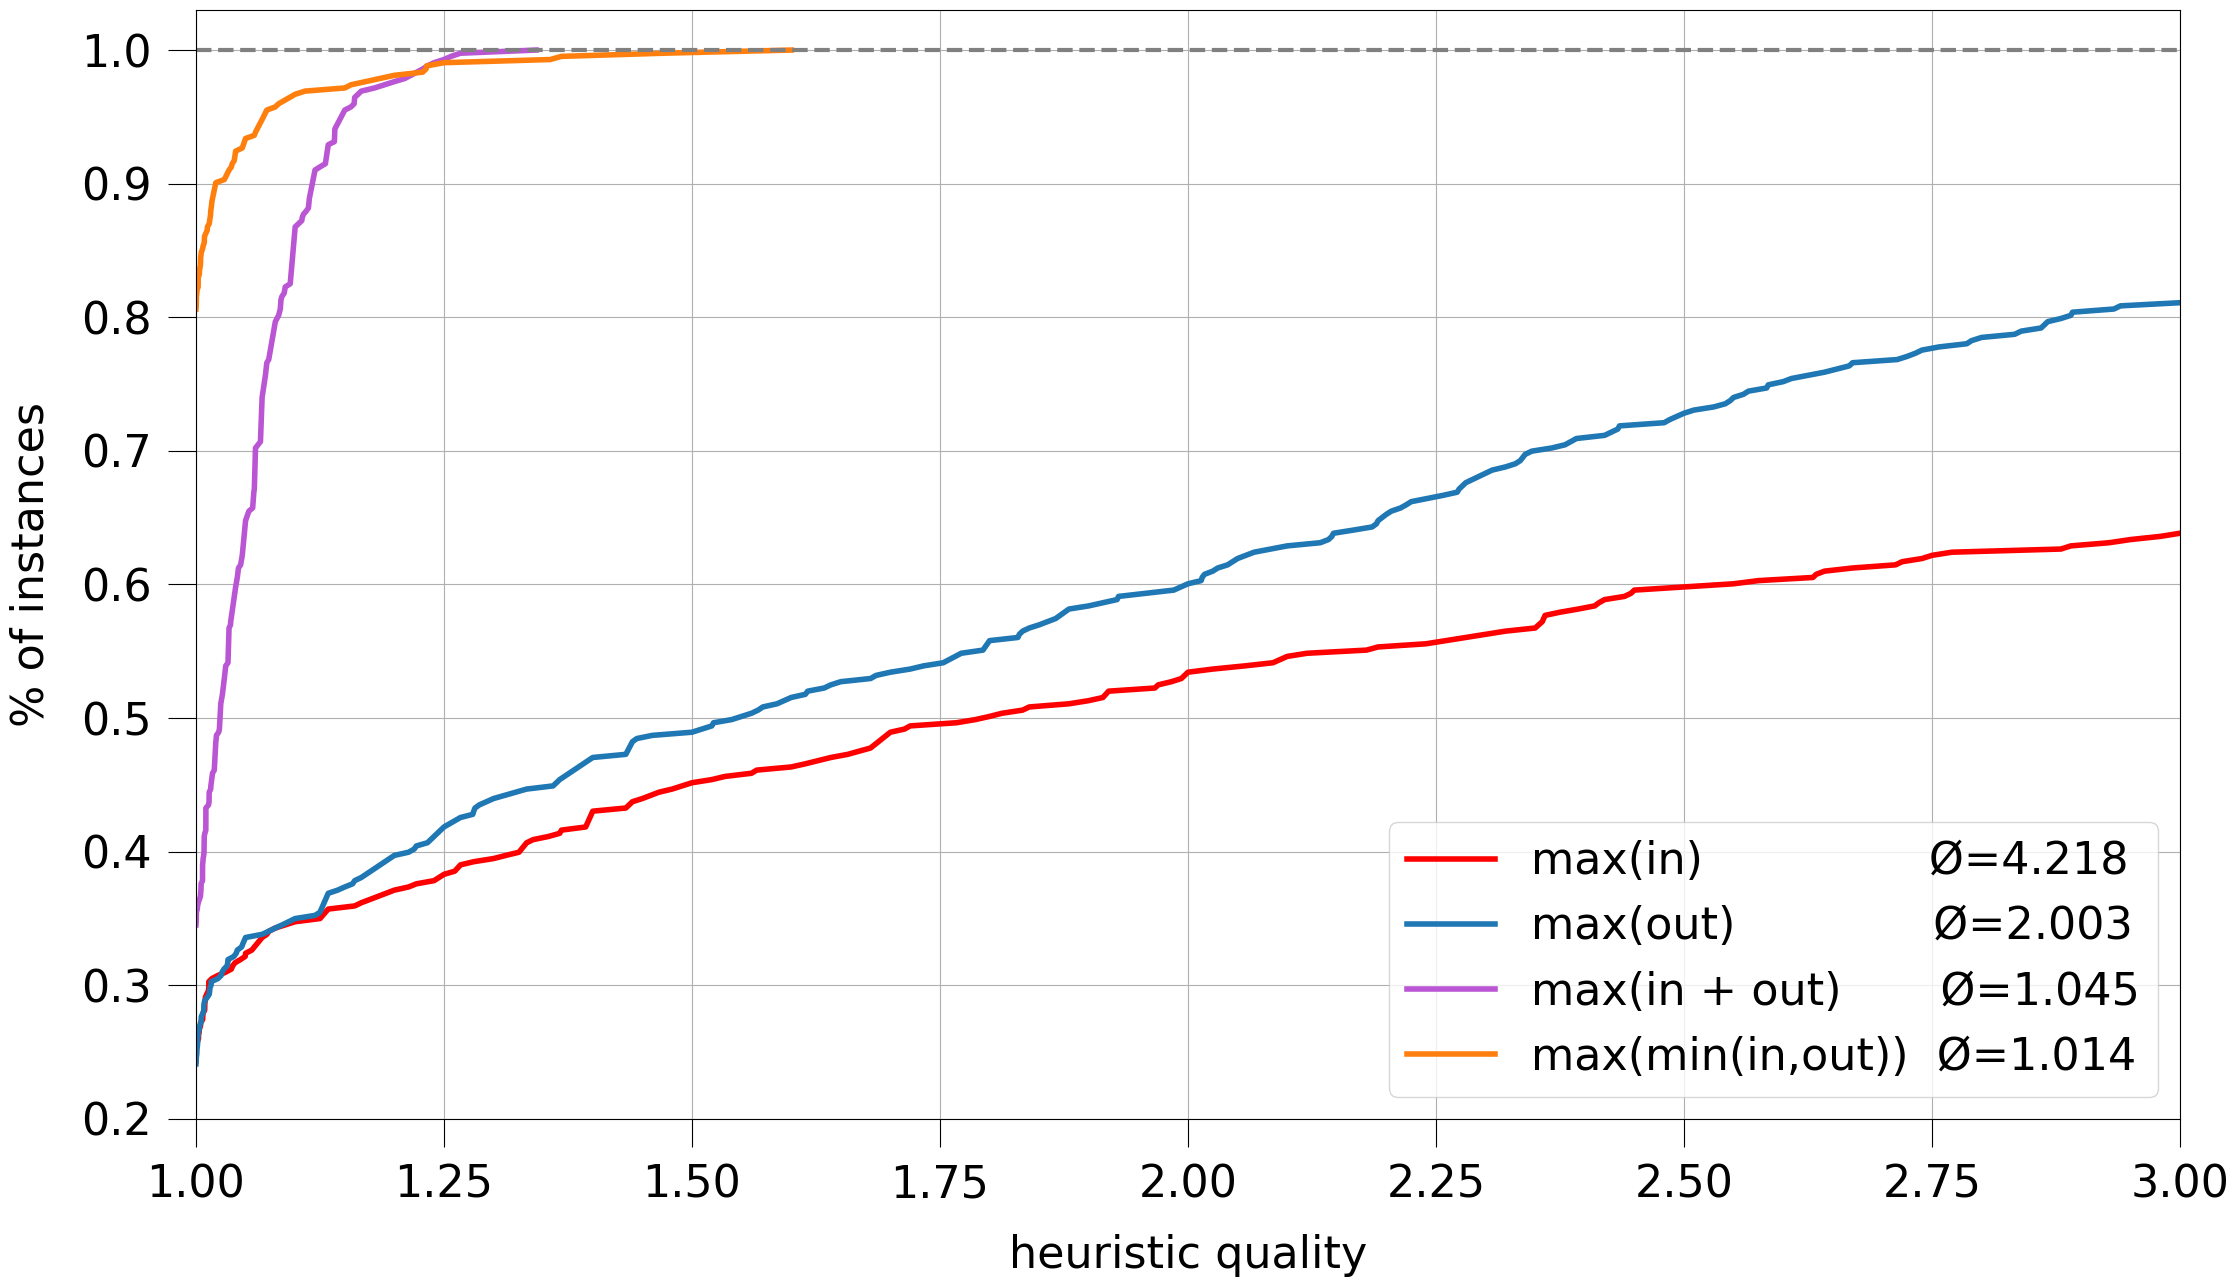

In [339]:
# Calculate percentage dataframes
df_0_perc = get_heuristic_percentage_df(dfh_v1)
df_1_perc = get_heuristic_percentage_df(dfh_v2)
df_2_perc = get_heuristic_percentage_df(dfh_v3)
df_3_perc = get_heuristic_percentage_df(dfh_v4)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_0_perc['percentage_solved'], c='red', linewidth='4', label='max(in)                Ø=' + str(round(dfh_v1['difference'].mean(), 3)))
ax.plot(df_1_perc['percentage_solved'], c='tab:blue', linewidth='4', label='max(out)              Ø=' + str(round(dfh_v2['difference'].mean(), 3)))
ax.plot(df_2_perc['percentage_solved'], c='mediumorchid', linewidth='4', label='max(in + out)       Ø=' + str(round(dfh_v3['difference'].mean(), 3)))
ax.plot(df_3_perc['percentage_solved'], c='tab:orange', linewidth='4', label='max(min(in,out))  Ø=' + str(round(dfh_v4['difference'].mean(), 3)))

ax.set_xlabel('heuristic quality', labelpad=20)
ax.set_ylabel('% of instances', labelpad=20)
ax.set_xlim([1, 3])
ax.set_ylim([0.2, 1.03])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 0.0, 1.59, 0), loc='lower center', ncol=1)

# Draw
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)

fig.savefig('plots/v5/DFVSNodesHeuristicLinePlot.png',  bbox_inches='tight')
fig.show()

# DFVS Cycles Heuristic Line Plot

Dataframe contains 423 elements
Dataframe contains 423 elements
Dataframe contains 423 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_21224/270607246.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


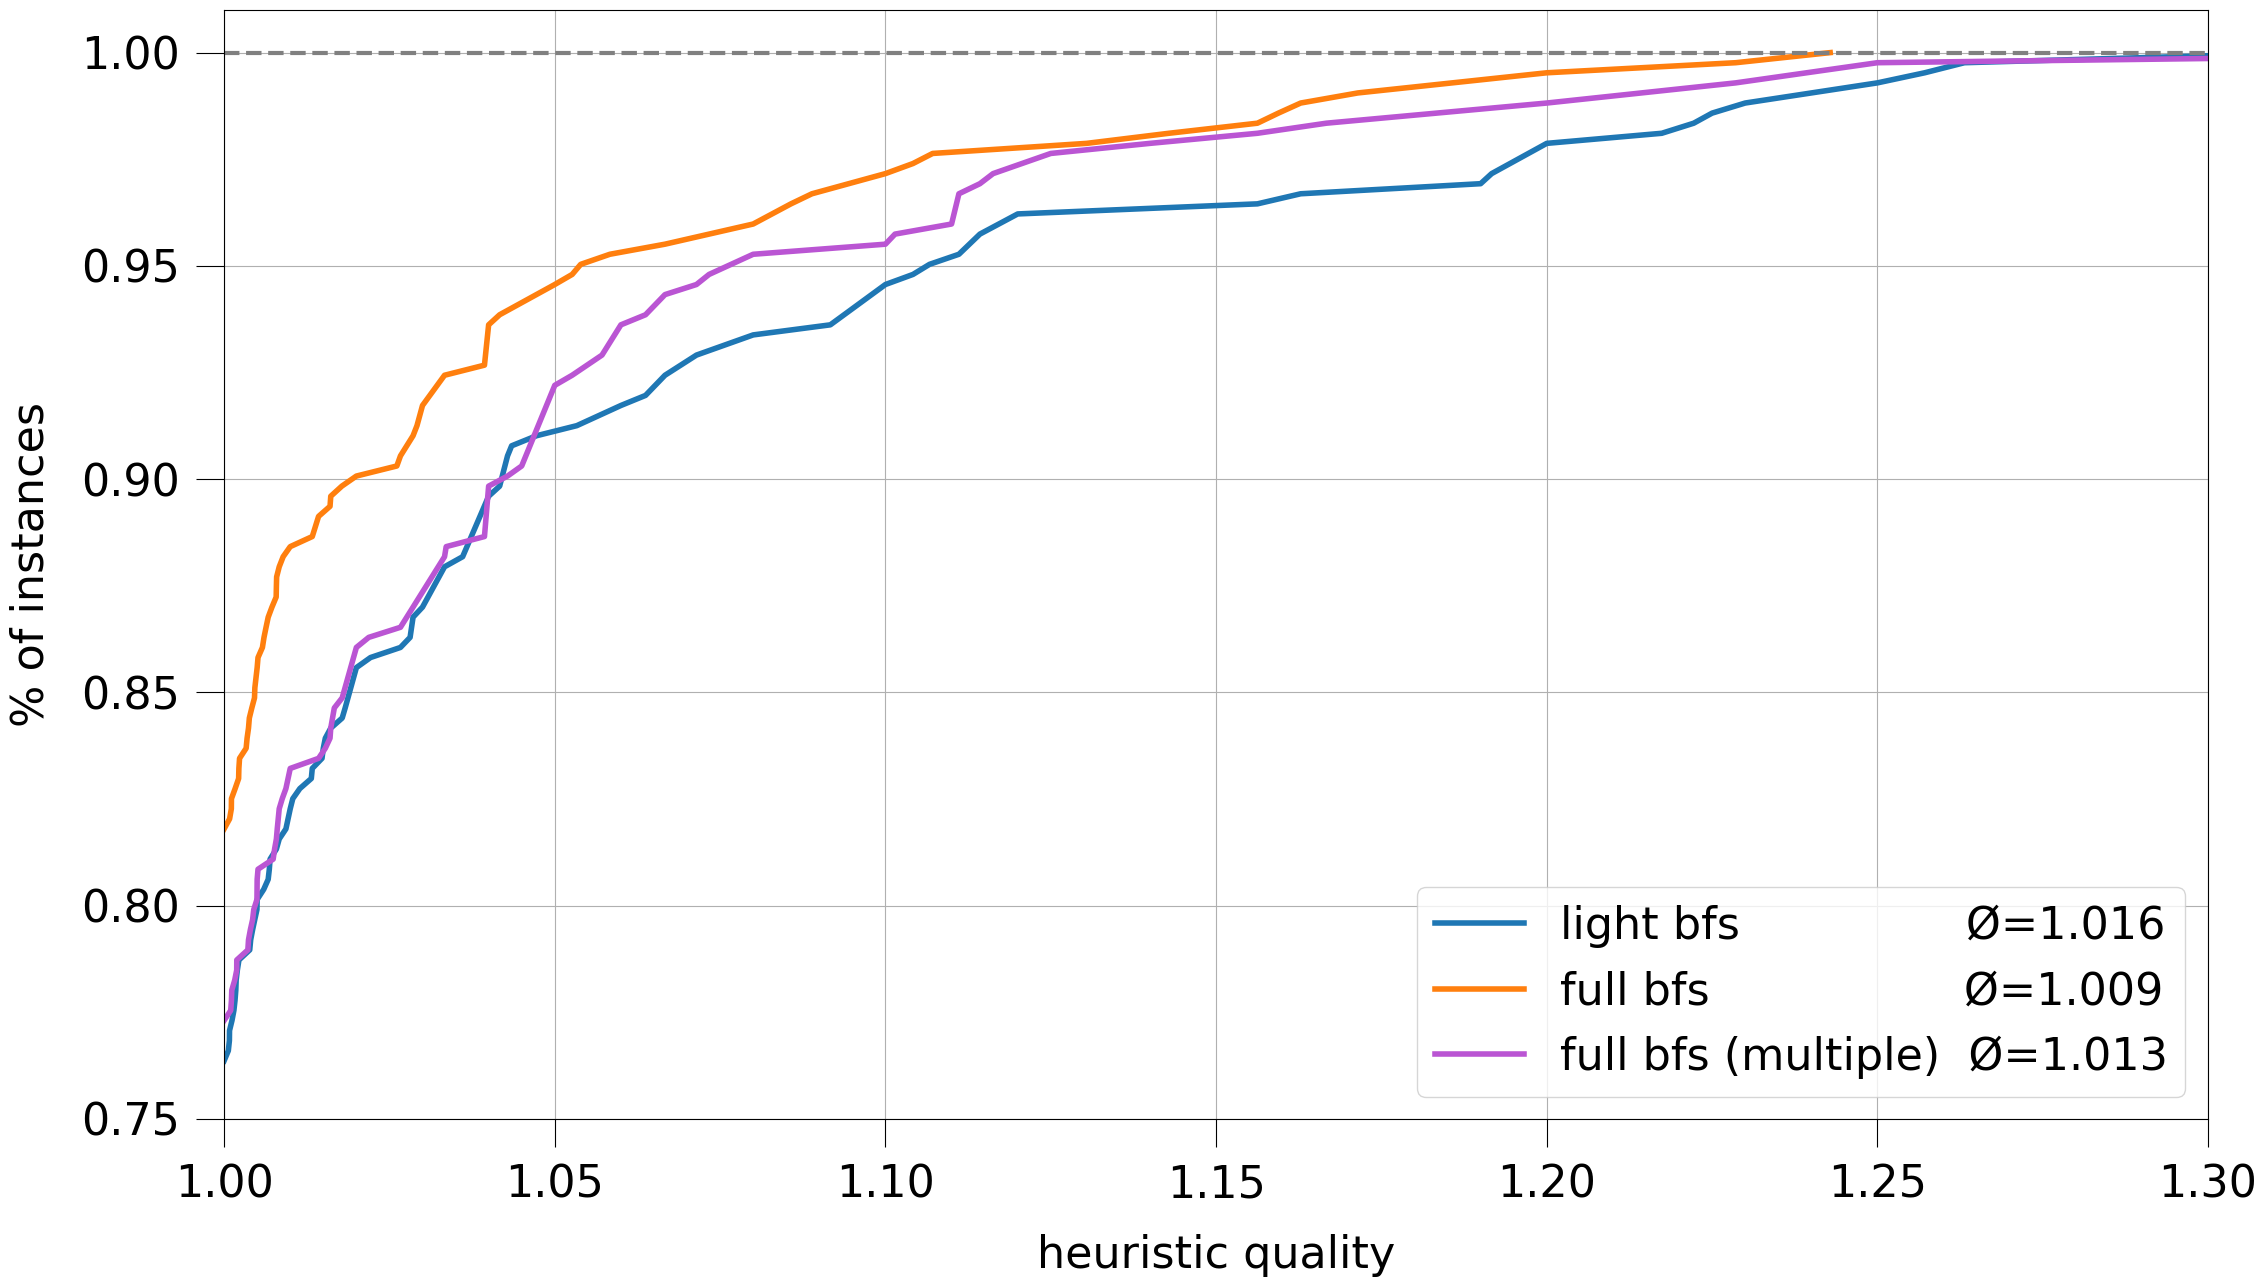

In [350]:
# Calculate percentage dataframes
df_1_perc = get_heuristic_percentage_df(dfh_v5)
df_2_perc = get_heuristic_percentage_df(dfh_v6)
df_3_perc = get_heuristic_percentage_df(dfh_v7)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_1_perc['percentage_solved'], c='tab:blue', linewidth='4', label='light bfs                Ø=' + str(round(dfh_v5['difference'].mean(), 3)))
ax.plot(df_2_perc['percentage_solved'], c='tab:orange', linewidth='4', label='full bfs                  Ø=' + str(round(dfh_v6['difference'].mean(), 3)))
ax.plot(df_3_perc['percentage_solved'], c='mediumorchid', linewidth='4', label='full bfs (multiple)  Ø=' + str(round(dfh_v7['difference'].mean(), 3)))

ax.set_xlabel('heuristic quality', labelpad=20)
ax.set_ylabel('% of instances', labelpad=20)
ax.set_xlim([1, 1.3])
ax.set_ylim([0.75, 1.01])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 0.0, 1.59, 0), loc='lower center', ncol=1)

# Draw
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)

dfh_v5_x, dfh_v5_y = get_heuristic_percentage_values(dfh_v5)
dfh_v6_x, dfh_v6_y = get_heuristic_percentage_values(dfh_v6)
dfh_v7_x, dfh_v7_y = get_heuristic_percentage_values(dfh_v7)

fig.savefig('plots/v5/DFVSCyclesHeuristicLinePlot.png',  bbox_inches='tight')
fig.show()

# DFVS Timer Heuristic Line Plot

Dataframe contains 423 elements
Dataframe contains 423 elements
Dataframe contains 423 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_21224/812587258.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


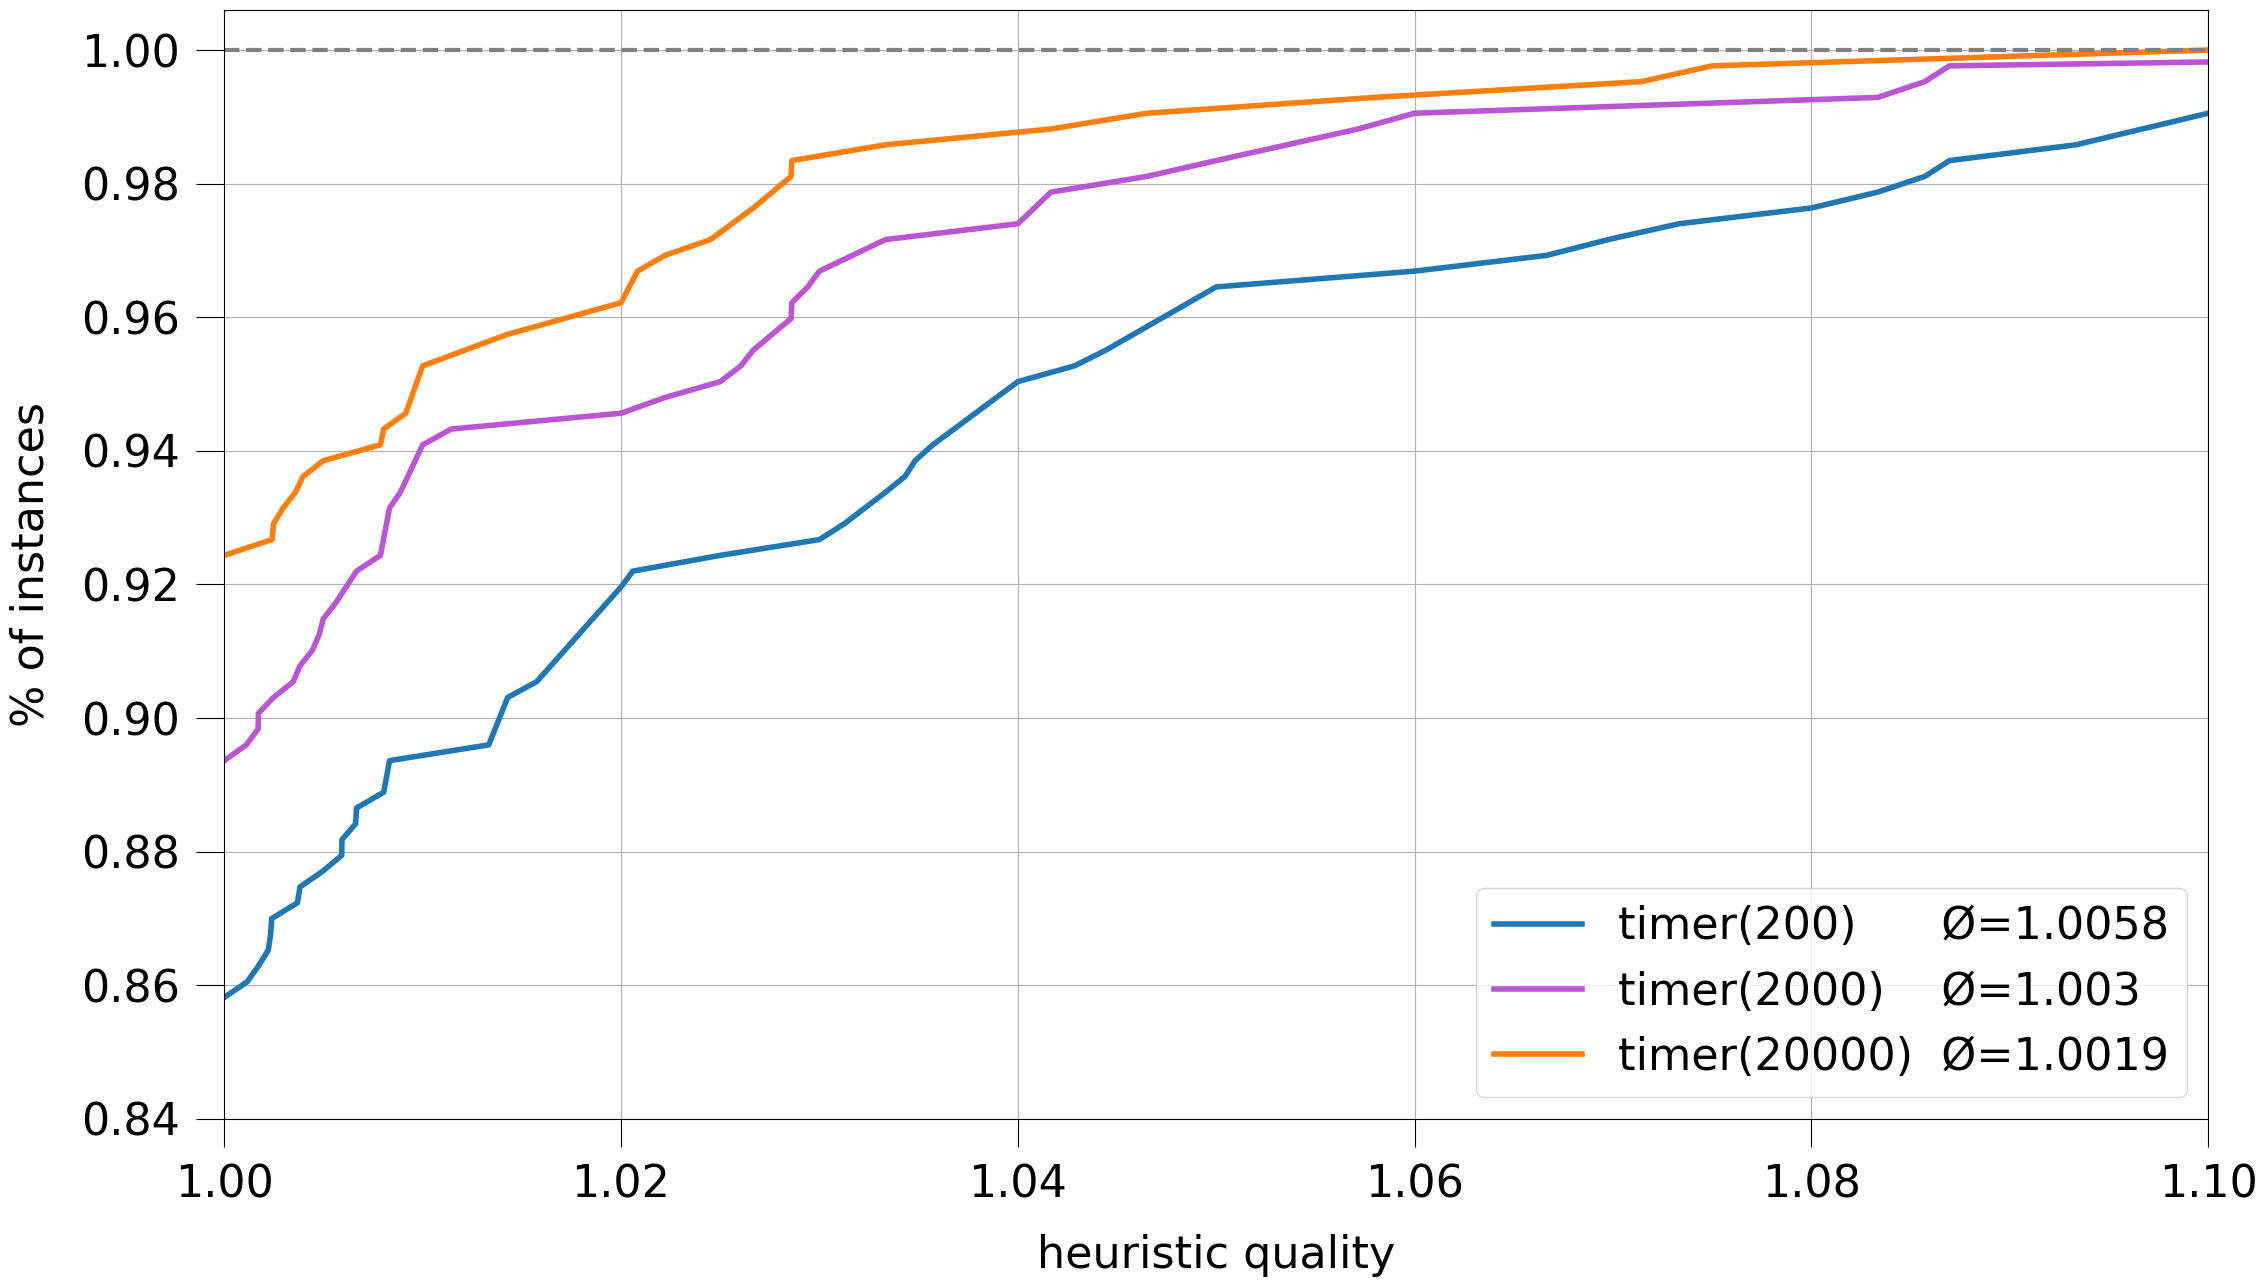

In [358]:
# Calculate percentage dataframes
df_0_perc = get_heuristic_percentage_df(dfh_v8)
df_1_perc = get_heuristic_percentage_df(dfh_v9)
df_2_perc = get_heuristic_percentage_df(dfh_v10)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_0_perc['percentage_solved'], c='tab:blue', linewidth='4', label='timer(200)      Ø=' + str(round(dfh_v8['difference'].mean(), 4)))
ax.plot(df_1_perc['percentage_solved'], c='mediumorchid', linewidth='4', label='timer(2000)    Ø=' + str(round(dfh_v9['difference'].mean(), 4)))
ax.plot(df_2_perc['percentage_solved'], c='tab:orange', linewidth='4', label='timer(20000)  Ø=' + str(round(dfh_v10['difference'].mean(), 4)))

ax.set_xlabel('heuristic quality', labelpad=20)
ax.set_ylabel('% of instances', labelpad=20)
ax.set_xlim([1, 1.1])
ax.set_ylim([0.84, 1.006])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 0.0, 1.62, 0), loc='lower center', ncol=1)

# Draw
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)

fig.savefig('plots/v5/DFVSTimerHeuristicLinePlot.png',  bbox_inches='tight')
fig.show()

# V3 vs V5 Percentage Graph

Dataframe contains 452 elements
Dataframe contains 452 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_21224/3787329777.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


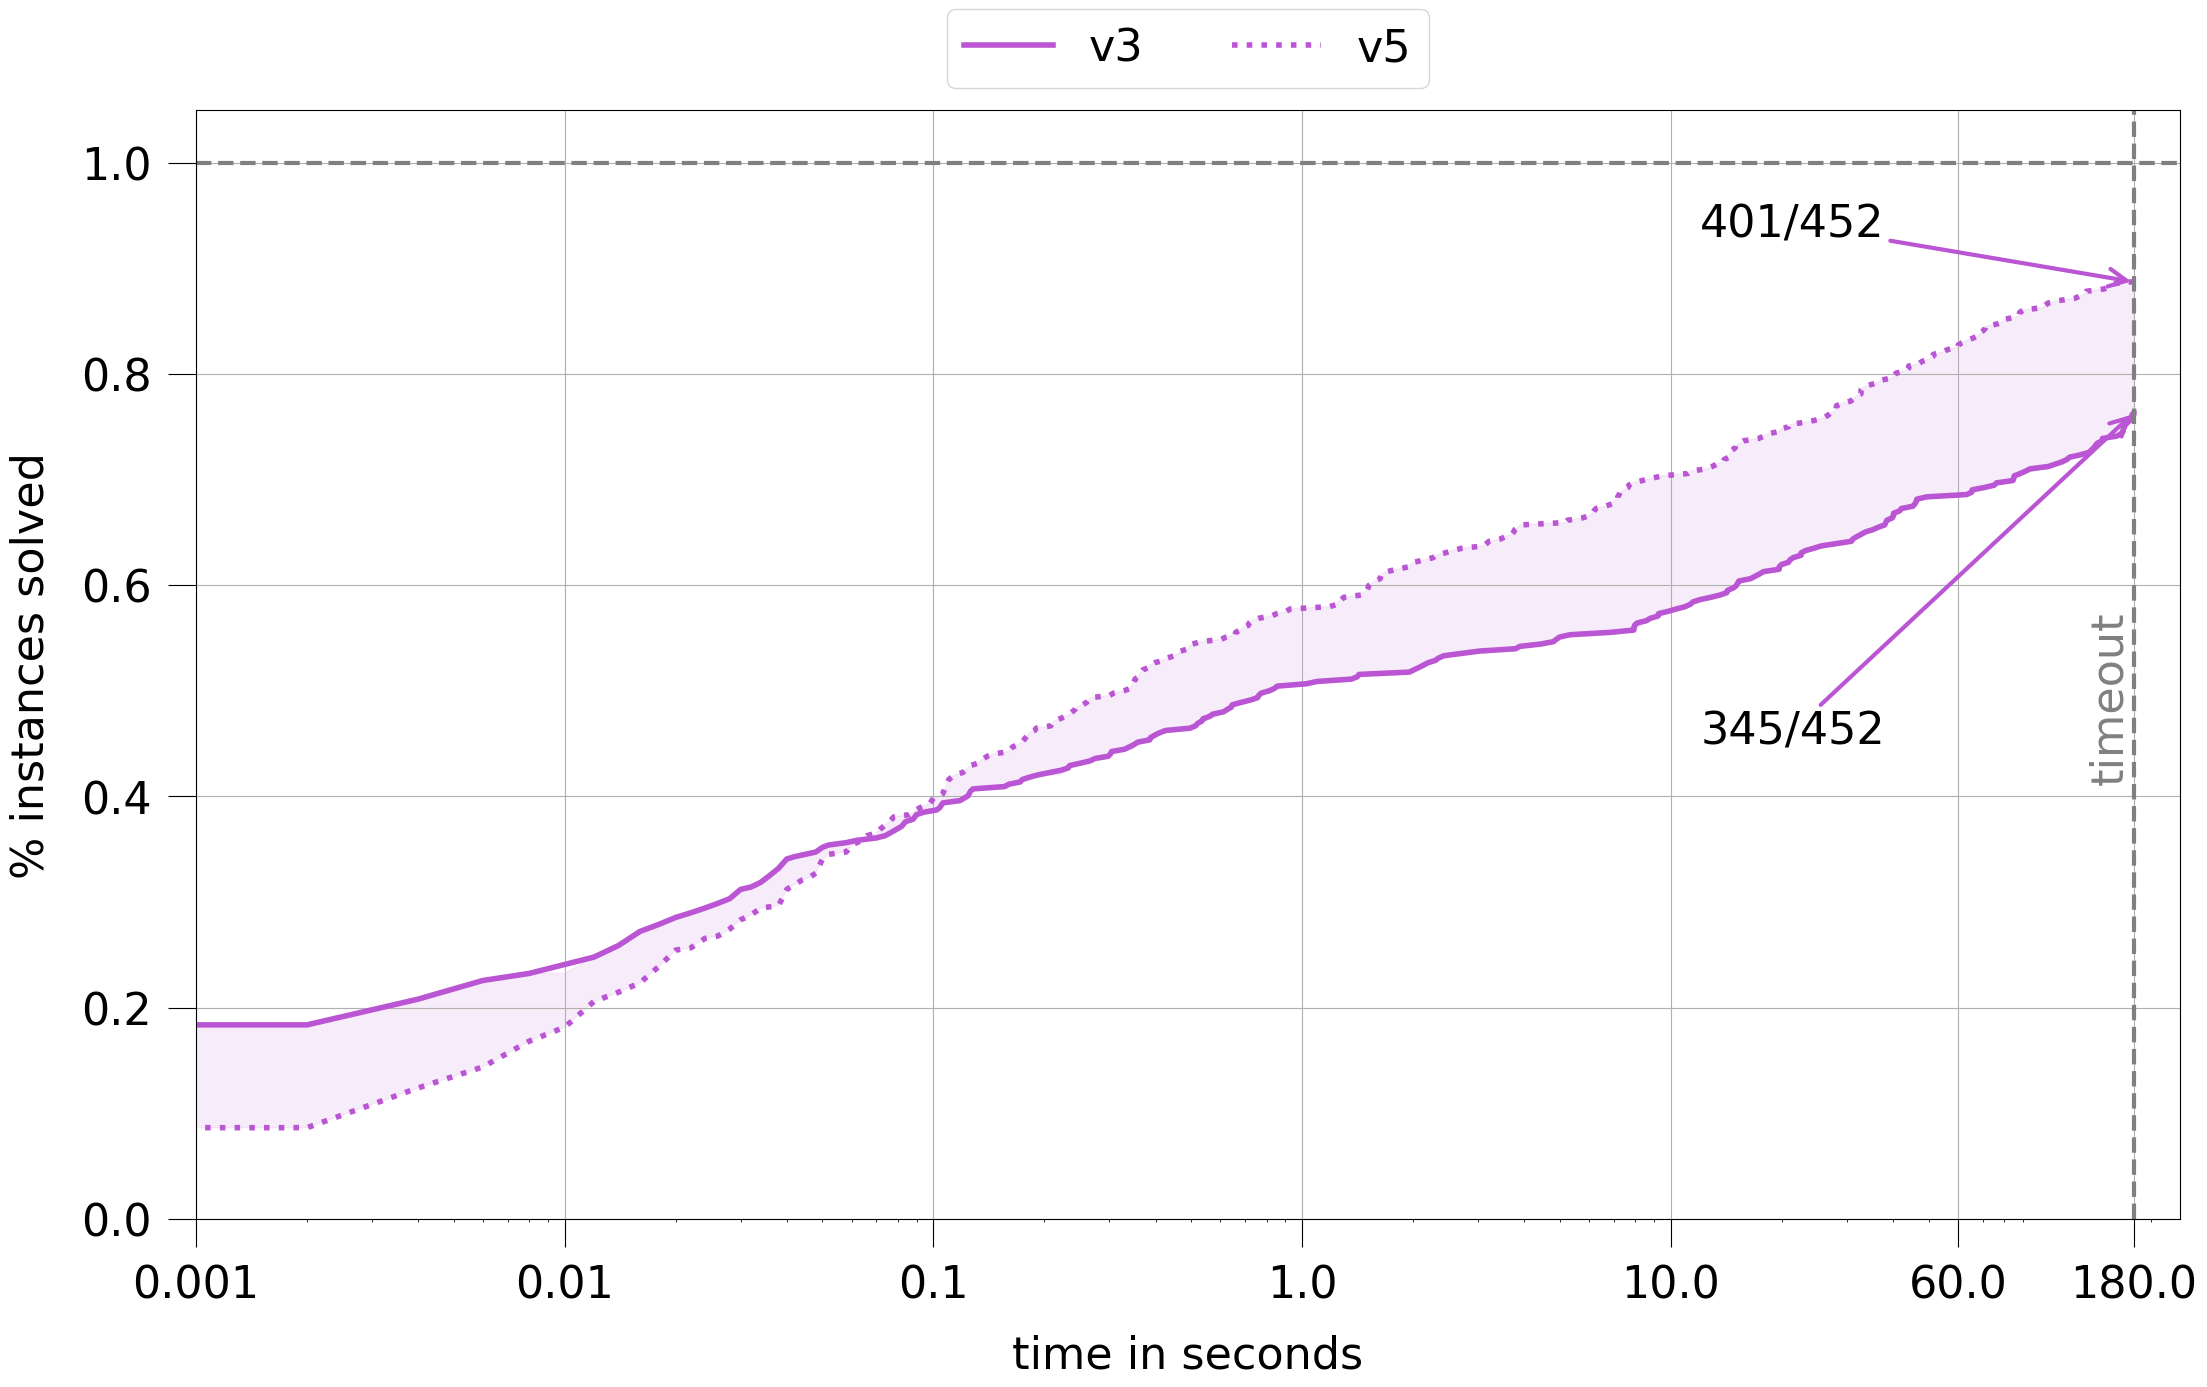

In [369]:
# Calculate percentage dataframes
df1_perc = get_percentage_df(df_0)
df0_perc = get_percentage_df(df_v3)

# Add percentage values (for the area between curves)
df1_perc = add_percentage_df(df1_perc, df_v3)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df0_perc['percentage_solved'], c='mediumorchid', linewidth='4', label='v3')
ax.plot(df1_perc['percentage_solved'], c='mediumorchid', linestyle=':', linewidth='4', label='v5')
# Fill area between cruves
ax.fill_between(df1_perc.index, df1_perc['percentage_solved'], df1_perc['percentage_solved_y'], color='mediumorchid', alpha=0.1)

ax.set_xlabel('time in seconds', labelpad=20)
ax.set_ylabel('% instances solved', labelpad=20)
ax.set_xlim([1, 240000])
ax.set_ylim([0, 1.05])
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)


v3_text, v3_perc = get_text_and_percent(df_v3)
ax.annotate(v3_text, xy=(180000, v3_perc), xycoords='data', xytext=(12000, 0.45), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=3, color='mediumorchid'))

v5_text, v5_perc = get_text_and_percent(df_0)
ax.annotate(v5_text, xy=(180000, v5_perc), xycoords='data', xytext=(12000, 0.93), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=3, color='mediumorchid'))

# Draw
ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
ax.text(135000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v5/LinePlotV3V5.png',  bbox_inches='tight')
fig.show()

# With Heuristic Percentage Graphs

Dataframe contains 452 elements
Dataframe contains 452 elements
Dataframe contains 452 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_21224/2050638178.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


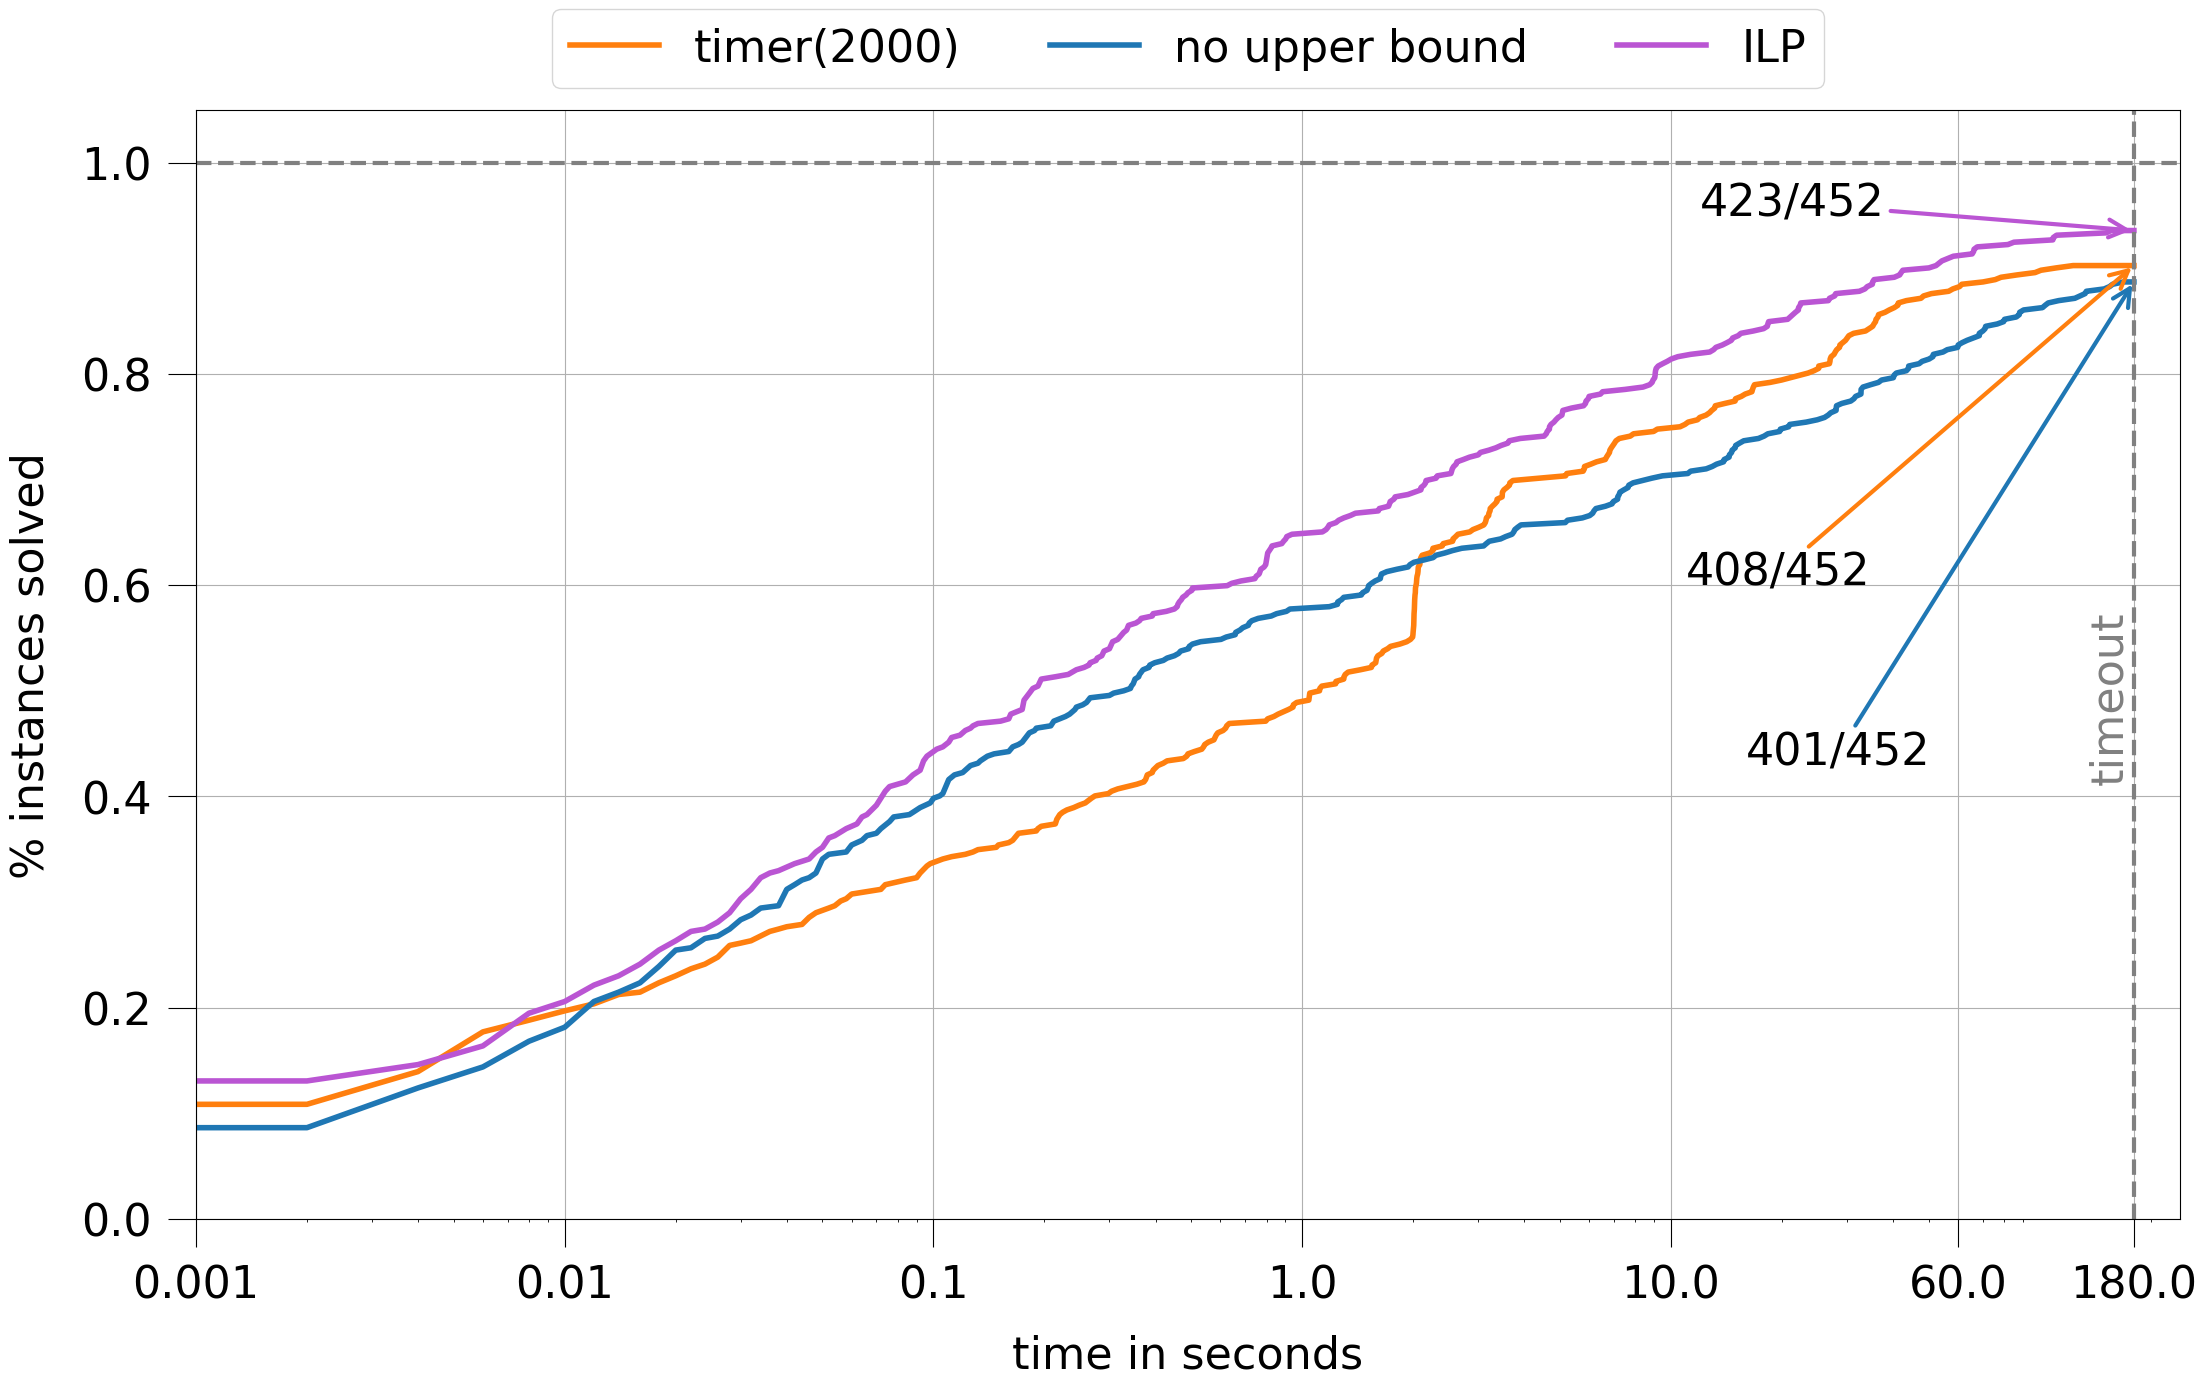

In [362]:
# Calculate percentage dataframes
df1_perc = get_percentage_df(df_ilp)
df2_perc = get_percentage_df(df_2)
df3_perc = get_percentage_df(df_0)

# Add percentage values (for the area between curves)
df1_perc = add_percentage_df(df1_perc, df_v3)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df2_perc['percentage_solved'], c='tab:orange', linewidth='4', label='timer(2000)')
ax.plot(df3_perc['percentage_solved'], c='tab:blue', linewidth='4', label='no upper bound')
ax.plot(df1_perc['percentage_solved'], c='mediumorchid', linewidth='4', label='ILP')

ax.set_xlabel('time in seconds', labelpad=20)
ax.set_ylabel('% instances solved', labelpad=20)
ax.set_xlim([1, 240000])
ax.set_ylim([0, 1.05])
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=3)

ilp_text, ilp_perc = get_text_and_percent(df_ilp)
ax.annotate(ilp_text, xy=(180000, ilp_perc), xycoords='data', xytext=(12000, 0.95), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=3, color='mediumorchid'))

df_2_text, df_2_perc = get_text_and_percent(df_2)
ax.annotate(df_2_text, xy=(180000, df_2_perc), xycoords='data', xytext=(11000, 0.6), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=3, color='tab:orange'))

df_0_text, df_0_perc = get_text_and_percent(df_0)
ax.annotate(df_0_text, xy=(180000, df_0_perc), xycoords='data', xytext=(16000, 0.43), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=3, color='tab:blue'))

# Draw
ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
ax.text(135000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v5/WithHeuristicLinePlot.png',  bbox_inches='tight')
fig.show()

# Heuristic box plot

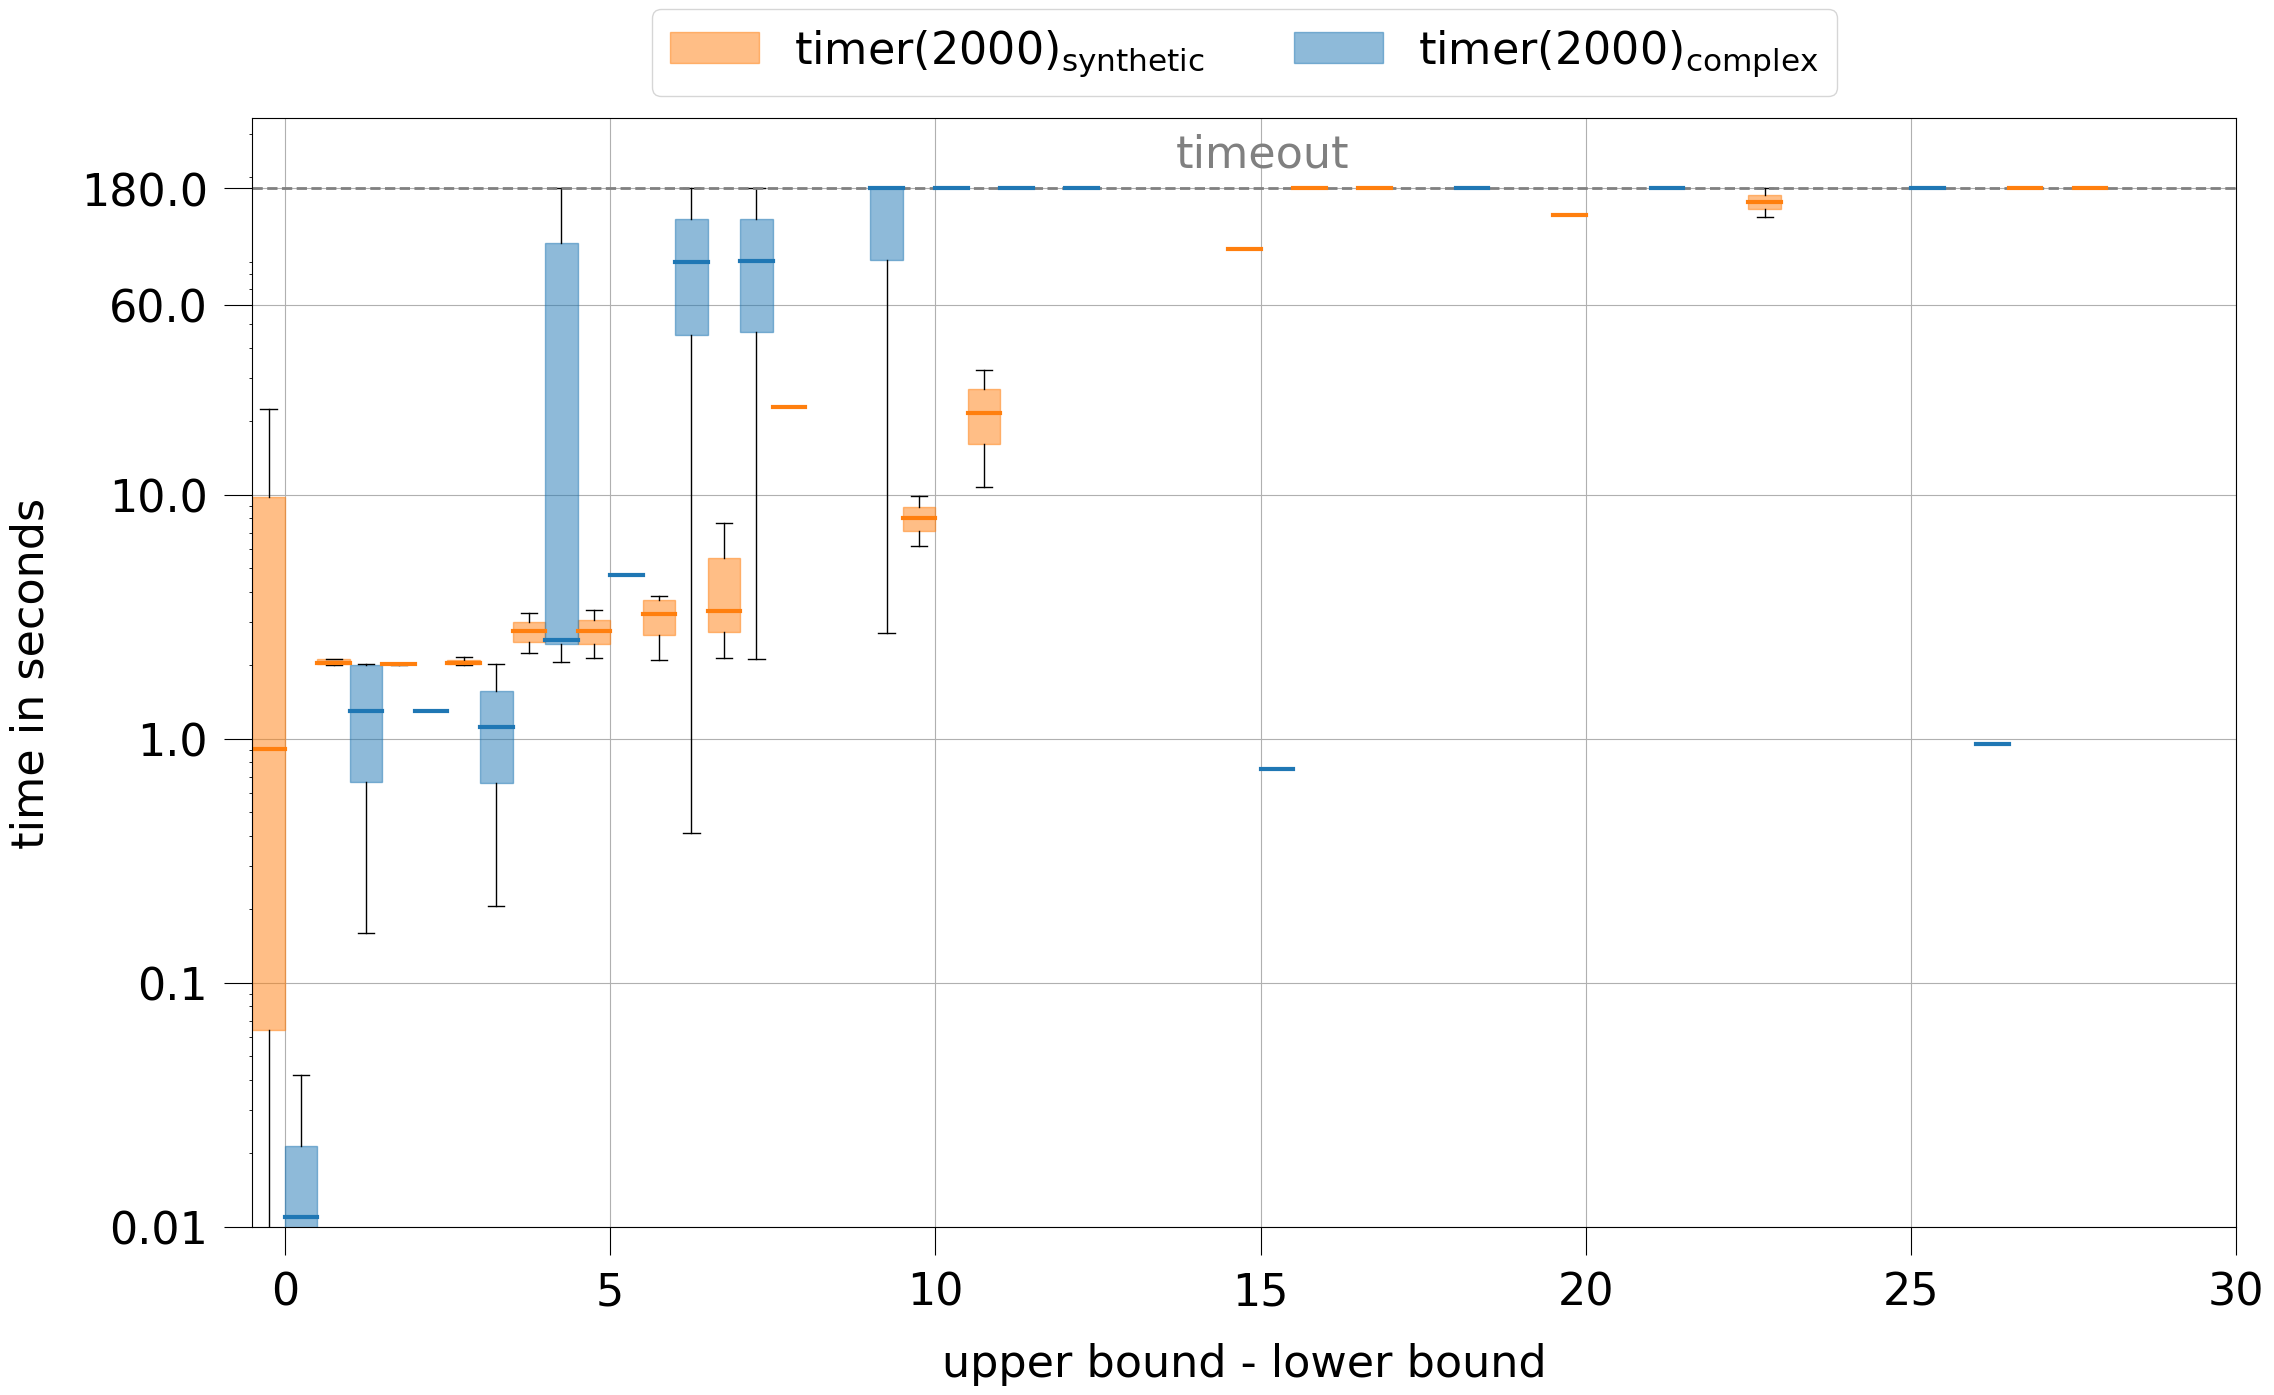

In [364]:
df_L_synthetic, df_L_complex = split_synthetic_complex(df_1)

box_size = 2
synthetic_data = []
complex_data = []
synthetic_positions = []
complex_positions = []
labels = [0]
for i in range(0, 30):
    upper_k = i
    lower_k = upper_k

    df_filter = df_L_synthetic[df_L_synthetic['difference'] == upper_k]
    df_filter.append(df_L_synthetic[df_L_synthetic['difference'] == lower_k])
    synthetic_data.append(list(df_filter['millis']))
    synthetic_positions.append(upper_k - 0.25)

    df_filter = df_L_complex[df_L_complex['difference'] == upper_k]
    df_filter.append(df_L_complex[df_L_complex['difference'] == lower_k])
    complex_data.append(list(df_filter['millis']))
    complex_positions.append(upper_k + 0.25)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
bp1 = ax.boxplot(synthetic_data, positions = synthetic_positions, patch_artist=True, medianprops=dict(color='tab:orange', linewidth=3), boxprops=dict(facecolor='tab:orange', color='tab:orange', alpha=0.5), showfliers=False)
bp2 = ax.boxplot(complex_data, positions = complex_positions, patch_artist=True, medianprops=dict(color='tab:blue', linewidth=3), boxprops=dict(facecolor='tab:blue', color='tab:blue', alpha=0.5), showfliers=False)
ax.set_xlabel('upper bound - lower bound', labelpad=20)
ax.set_ylabel('time in seconds', labelpad=20)
ax.set_xlim([-0.5, 30])
ax.set_ylim([10, 350000])
ax.set_yscale('log')
ax.set_xticks([0, 5, 10, 15, 20, 25, 30])
ax.set_xticklabels([0, 5, 10, 15, 20, 25, 30])
ax.set_yticks([10, 100, 1000, 10000, 60000, 180000])
ax.set_yticklabels([0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['$timer(2000)_{synthetic}$', '$timer(2000)_{complex}$'], bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
ax.axhline(y=180000, color='gray', linestyle='--', linewidth=2)
ax.text(13.7, 220000, "timeout", color='gray')

fig.savefig('plots/v5/Dataset3BoxPlot.png',  bbox_inches='tight')

# PACE Line Plot

Dataframe contains 100 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_21224/1469990861.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


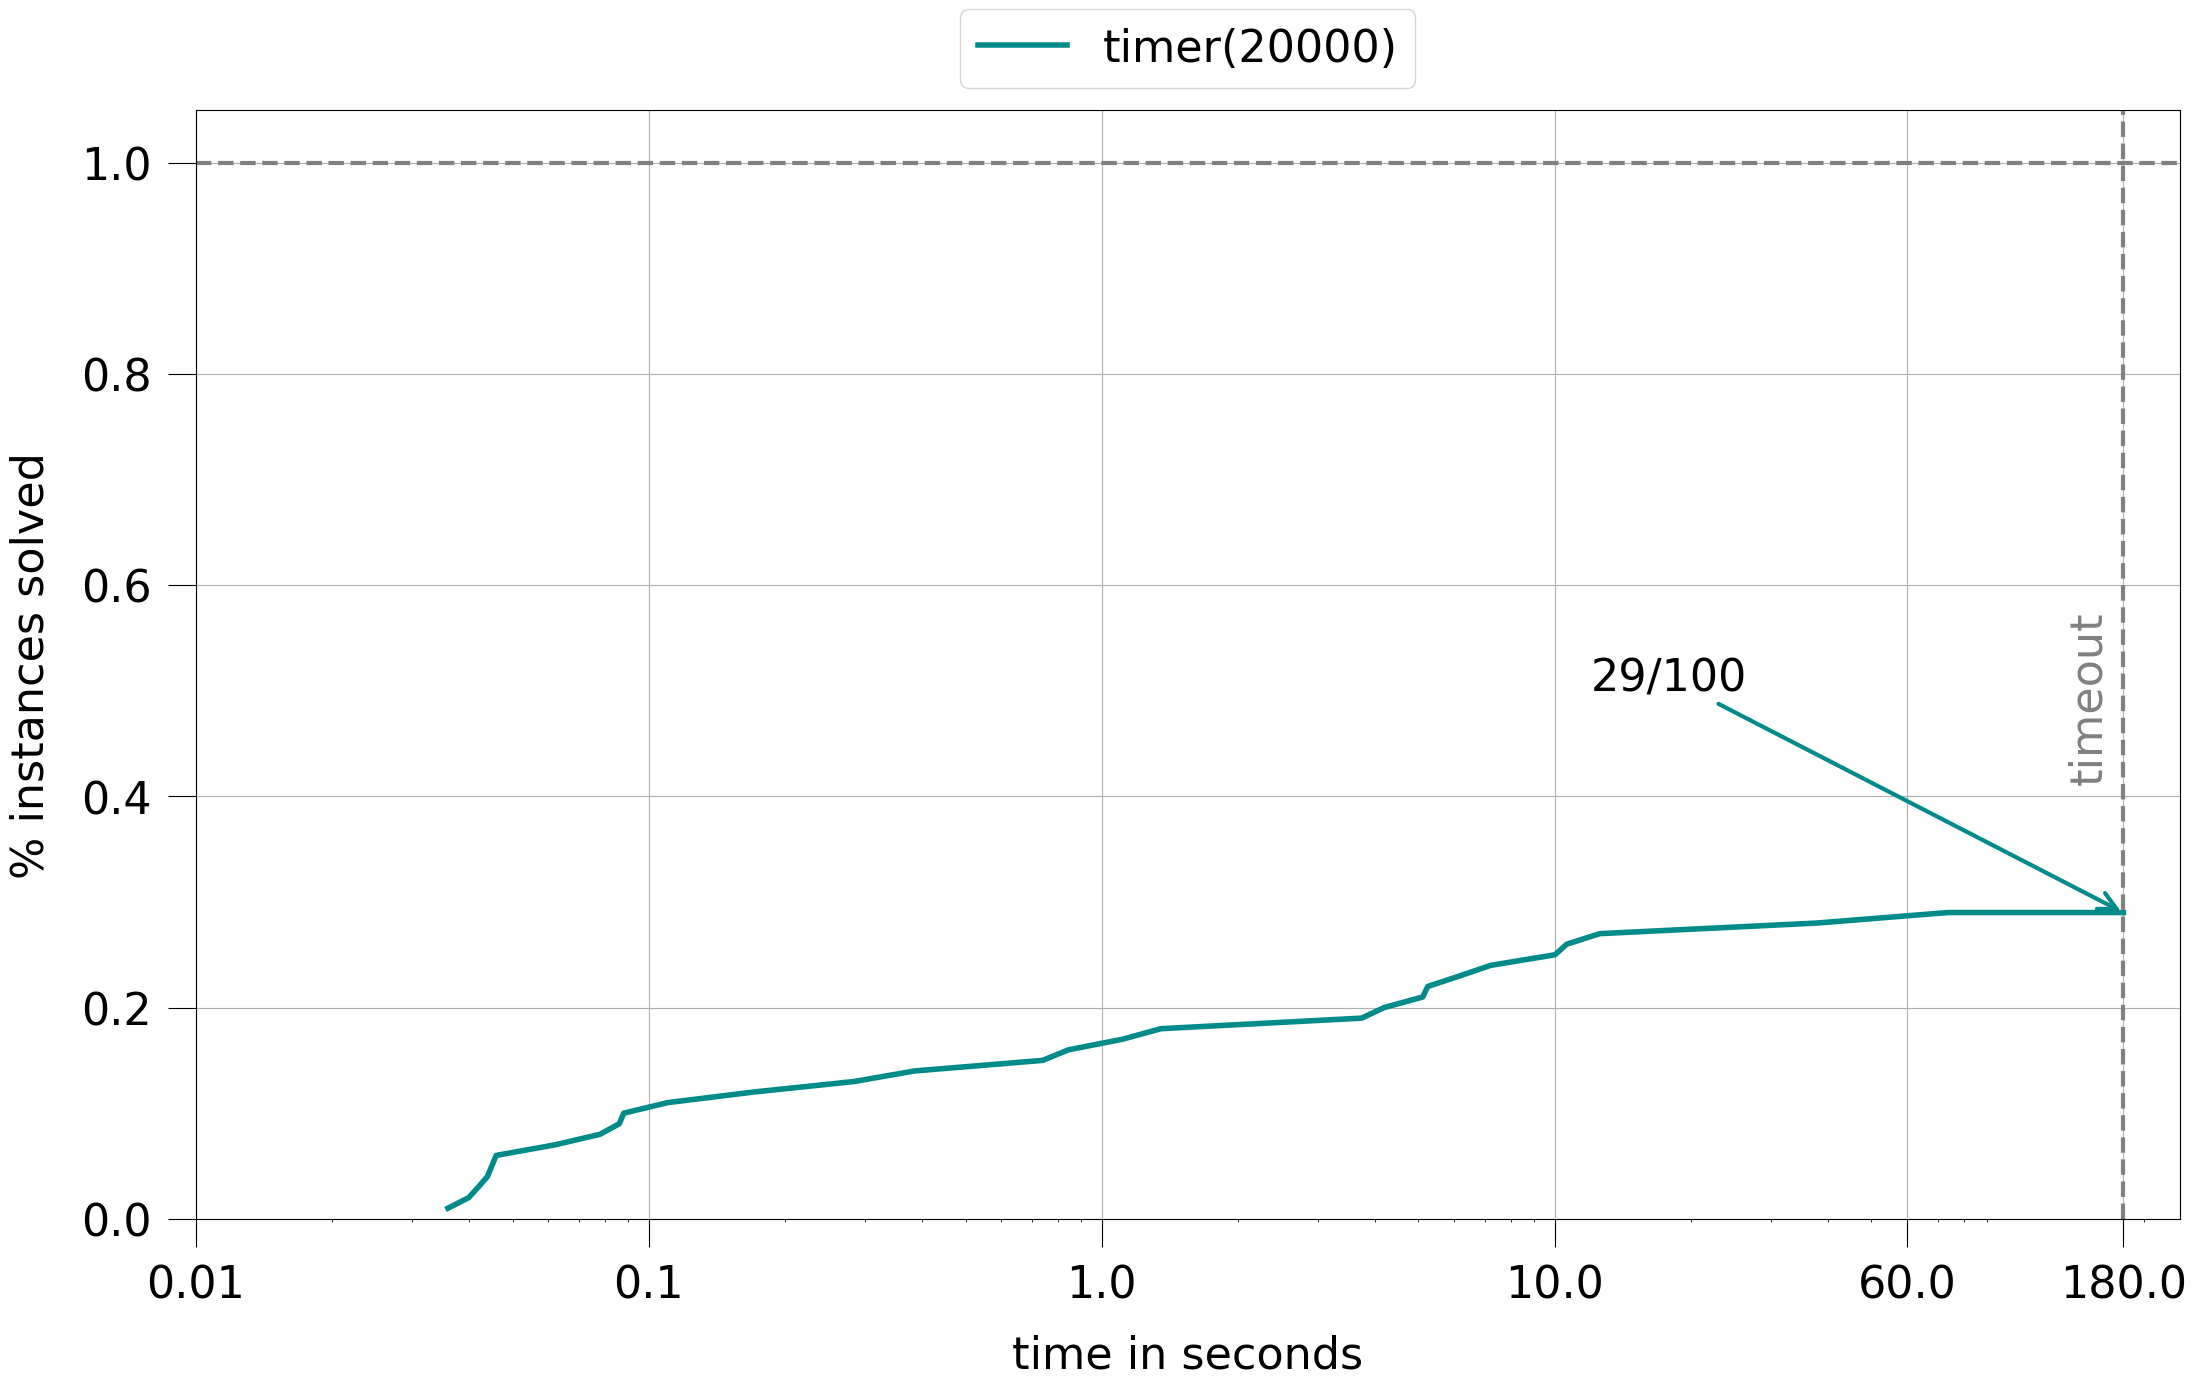

In [400]:


# Calculate percentage dataframes
df0_perc = get_percentage_df(df_pace)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df0_perc['percentage_solved'], c='darkcyan', linewidth='4', label='timer(20000)')

ax.set_xlabel('time in seconds', labelpad=20)
ax.set_ylabel('% instances solved', labelpad=20)
ax.set_xlim([10, 240000])
ax.set_ylim([0, 1.05])
ax.set_xscale('log')
ax.set_xticks([10, 100, 1000, 10000, 60000, 180000])
ax.set_xticklabels([0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)


pace_text, pace_perc = get_text_and_percent(df_pace)
ax.annotate(pace_text, xy=(180000, pace_perc), xycoords='data', xytext=(12000, 0.5), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=3, color='darkcyan'))

# Draw
ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
ax.text(135000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v5/LinePlotPACE.png',  bbox_inches='tight')
fig.show()

# Boxplot PACE

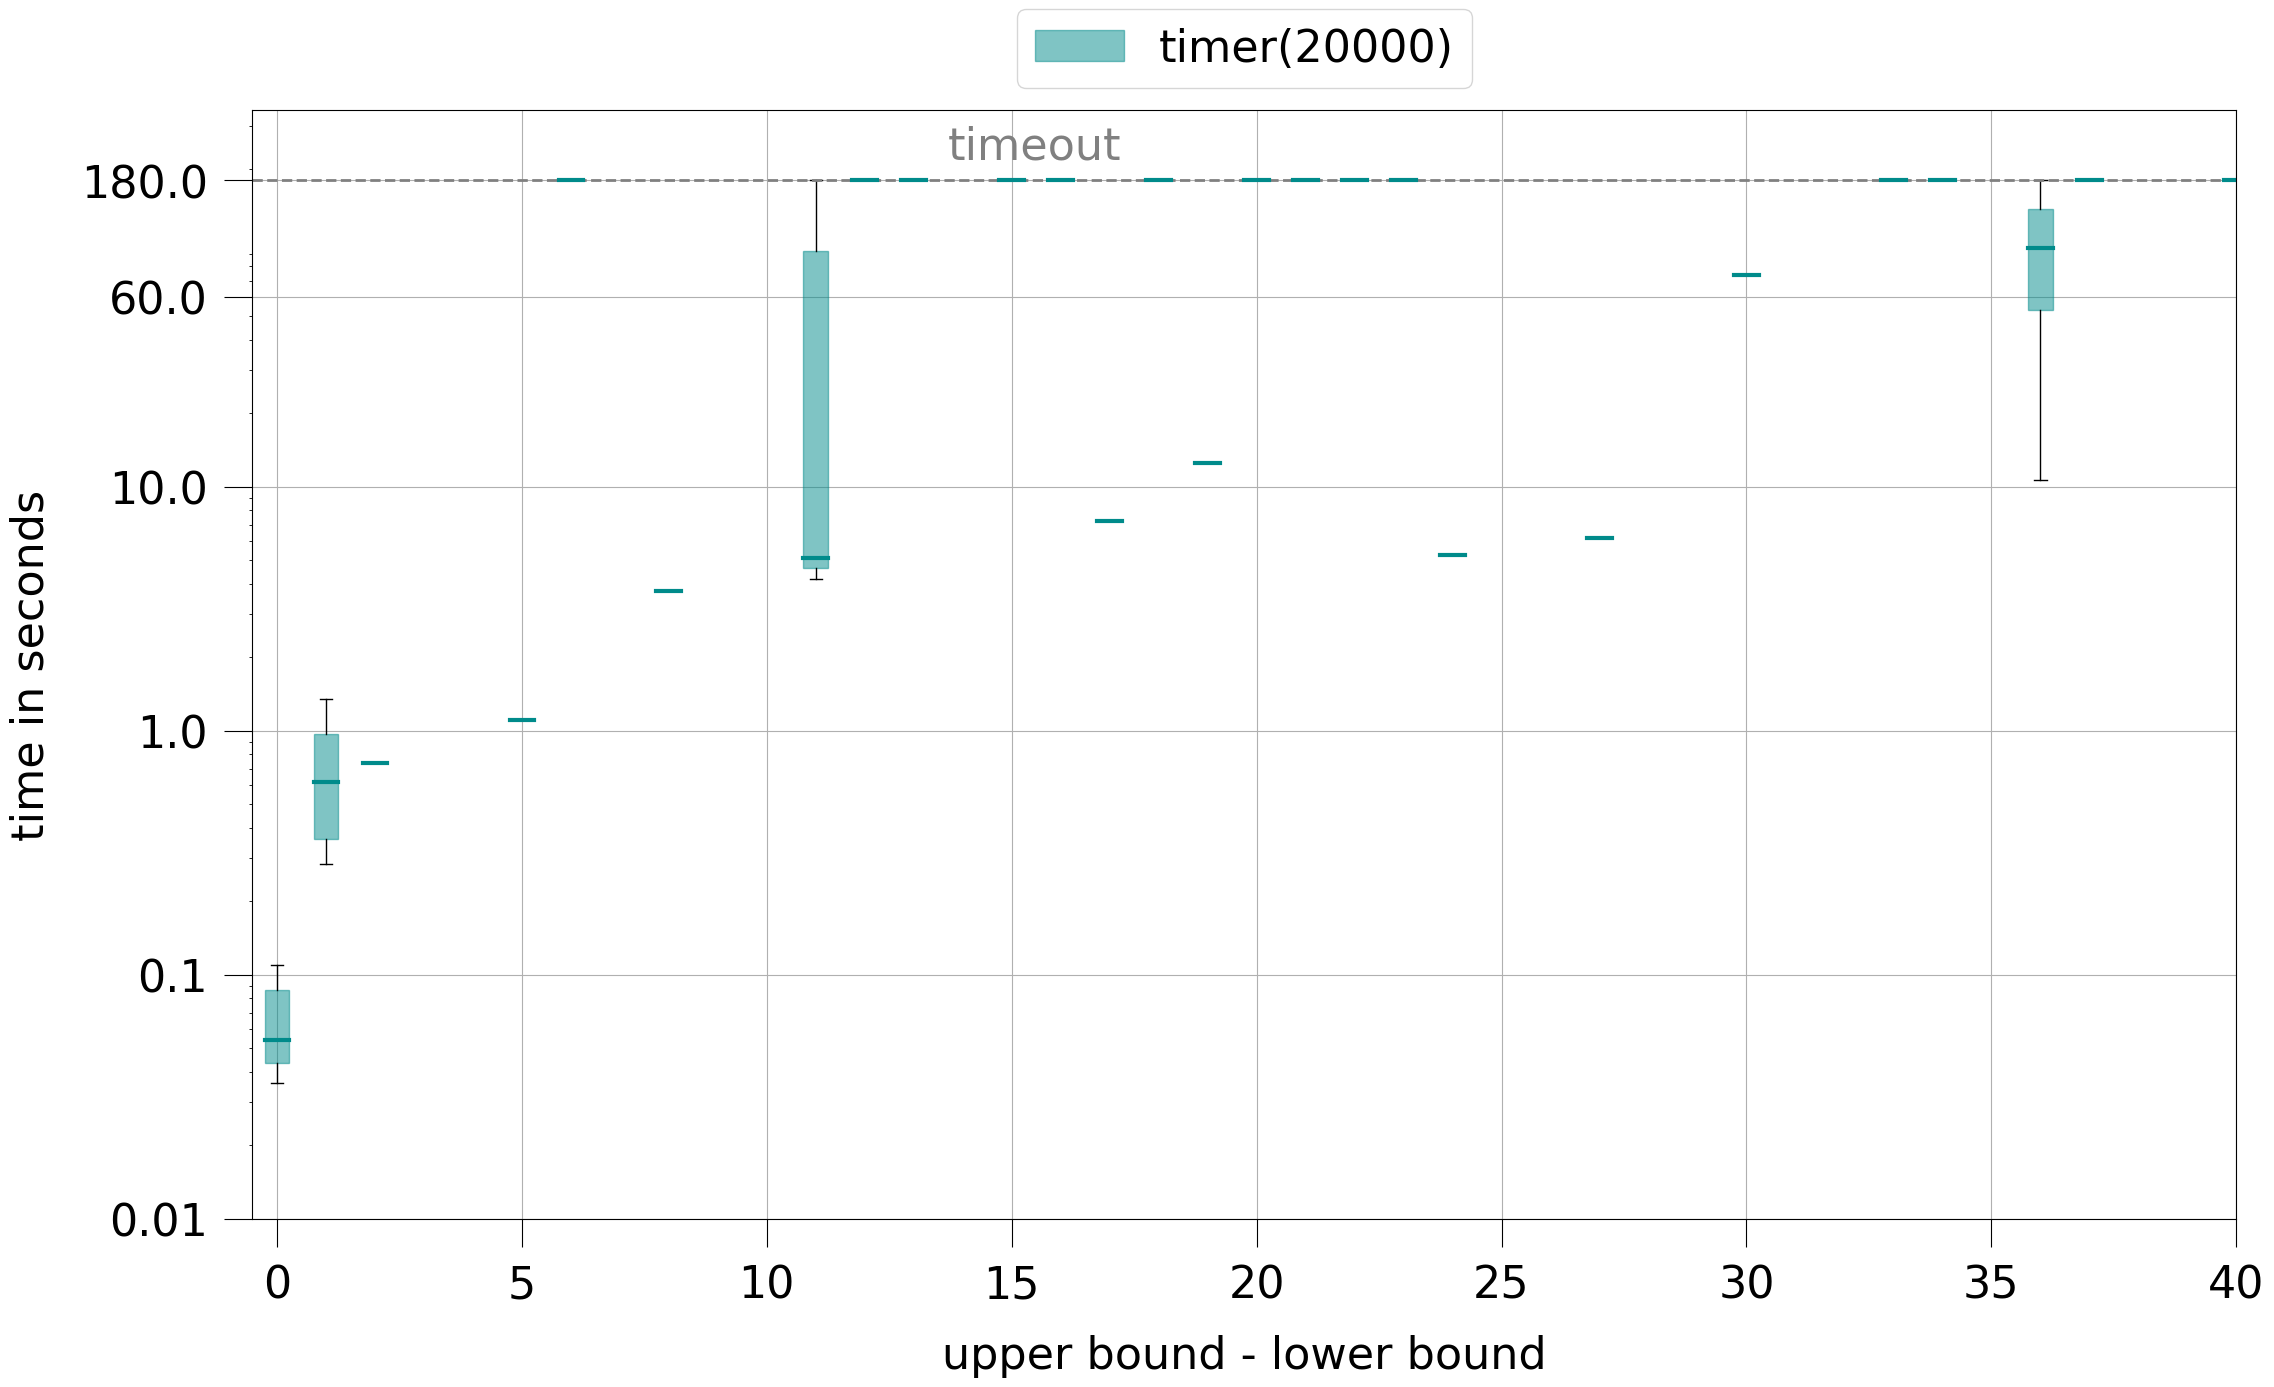

In [403]:

box_size = 2
data = []
positions = []
labels = [0]
for i in range(0, 50):
    upper_k = i
    lower_k = upper_k

    df_filter = df_pace[df_pace['difference'] == upper_k]
    if upper_k == 0:
        df_filter = df_filter[df_filter['millis'] < 90000]
    df_filter.append(df_pace[df_pace['difference'] == lower_k])
    data.append(list(df_filter['millis']))
    positions.append(upper_k)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
bp1 = ax.boxplot(data, positions = positions, patch_artist=True, medianprops=dict(color='darkcyan', linewidth=3), boxprops=dict(facecolor='darkcyan', color='darkcyan', alpha=0.5), showfliers=False)
ax.set_xlabel('upper bound - lower bound', labelpad=20)
ax.set_ylabel('time in seconds', labelpad=20)
ax.set_xlim([-0.5, 40])
ax.set_ylim([10, 350000])
ax.set_yscale('log')
ax.set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40])
ax.set_xticklabels([0, 5, 10, 15, 20, 25, 30, 35, 40])
ax.set_yticks([10, 100, 1000, 10000, 60000, 180000])
ax.set_yticklabels([0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend([bp1["boxes"][0]], ['timer(20000)'], bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
ax.axhline(y=180000, color='gray', linestyle='--', linewidth=2)
ax.text(13.7, 220000, "timeout", color='gray')

fig.savefig('plots/v5/Dataset3BoxPlot.png',  bbox_inches='tight')

# Boxplot

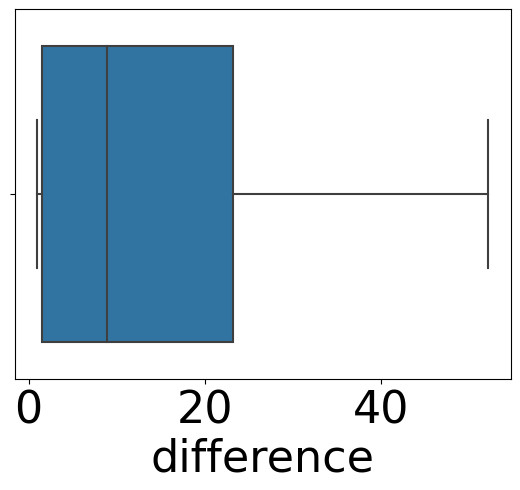

In [290]:
ax = sns.boxplot(x=dfh_a1["difference"])